# Anomaly Detection with Kaggle Pump Dataset

This collection of notebooks will explore several anomaly detection techniques applied to a simple dataset.

url = https://www.kaggle.com/datasets/nphantawee/pump-sensor-data

The data are from all available sensor, all of them are raw value. Total sensors are 52.

In the first Notebook we will perform the ordinary EDA analysis and we will prepare the data for further analysis.


## 0 Import Libraries and setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid", font_scale=1.5)
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
sns.set_theme()

In [2]:
# Read data
pump_df = pd.read_csv('./pump_data_set/sensor.csv')
pump_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 55 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      220320 non-null  int64  
 1   timestamp       220320 non-null  object 
 2   sensor_00       210112 non-null  float64
 3   sensor_01       219951 non-null  float64
 4   sensor_02       220301 non-null  float64
 5   sensor_03       220301 non-null  float64
 6   sensor_04       220301 non-null  float64
 7   sensor_05       220301 non-null  float64
 8   sensor_06       215522 non-null  float64
 9   sensor_07       214869 non-null  float64
 10  sensor_08       215213 non-null  float64
 11  sensor_09       215725 non-null  float64
 12  sensor_10       220301 non-null  float64
 13  sensor_11       220301 non-null  float64
 14  sensor_12       220301 non-null  float64
 15  sensor_13       220301 non-null  float64
 16  sensor_14       220299 non-null  float64
 17  sensor_15 

## 1.1 Data Cleaning

From the .info() method we appreciate that there exist columns like 'Unnamed: 0' which 
duplicate the index from pandas, also 'sensor_15' has no data

In [3]:
pump_df.drop(["sensor_15", "Unnamed: 0"], inplace=True, axis=1)

# Check missing values

print(pump_df.isnull().sum().sort_values(ascending=False))

# Convert column timestamp to datetime

pump_df['timestamp'] = pd.to_datetime(pump_df.timestamp)
pump_df.set_index('timestamp',inplace =True)

# Convert Machine Status to Categrorical, for efficiency and usage in statistical plots
pump_df['machine_status'] = pump_df.machine_status.astype('category')


sensor_50         77017
sensor_51         15383
sensor_00         10208
sensor_07          5451
sensor_08          5107
sensor_06          4798
sensor_09          4595
sensor_01           369
sensor_30           261
sensor_29            72
sensor_32            68
sensor_17            46
sensor_18            46
sensor_22            41
sensor_25            36
sensor_16            31
sensor_49            27
sensor_48            27
sensor_47            27
sensor_46            27
sensor_45            27
sensor_44            27
sensor_43            27
sensor_42            27
sensor_41            27
sensor_40            27
sensor_39            27
sensor_38            27
sensor_14            21
sensor_26            20
sensor_03            19
sensor_10            19
sensor_13            19
sensor_12            19
sensor_11            19
sensor_05            19
sensor_04            19
sensor_02            19
sensor_36            16
sensor_37            16
sensor_28            16
sensor_27       

## 1.2 Missing Values Threatment

In [4]:
# Delete the sensors (columns) with more than 1000 measures lost 
# (This is just a criteria which can be replaced)
threshold = 1000
pump_df = pump_df[pump_df.columns[pump_df.isnull().sum() < threshold]]
pump_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 220320 entries, 2018-04-01 00:00:00 to 2018-08-31 23:59:00
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   sensor_01       219951 non-null  float64 
 1   sensor_02       220301 non-null  float64 
 2   sensor_03       220301 non-null  float64 
 3   sensor_04       220301 non-null  float64 
 4   sensor_05       220301 non-null  float64 
 5   sensor_10       220301 non-null  float64 
 6   sensor_11       220301 non-null  float64 
 7   sensor_12       220301 non-null  float64 
 8   sensor_13       220301 non-null  float64 
 9   sensor_14       220299 non-null  float64 
 10  sensor_16       220289 non-null  float64 
 11  sensor_17       220274 non-null  float64 
 12  sensor_18       220274 non-null  float64 
 13  sensor_19       220304 non-null  float64 
 14  sensor_20       220304 non-null  float64 
 15  sensor_21       220304 non-null  float64 
 16  sens

In [5]:
# Replace rest of nan with the mean value
pump_df.fillna(pump_df.mean(), inplace=True)
pump_df.isnull().sum()

sensor_01         0
sensor_02         0
sensor_03         0
sensor_04         0
sensor_05         0
sensor_10         0
sensor_11         0
sensor_12         0
sensor_13         0
sensor_14         0
sensor_16         0
sensor_17         0
sensor_18         0
sensor_19         0
sensor_20         0
sensor_21         0
sensor_22         0
sensor_23         0
sensor_24         0
sensor_25         0
sensor_26         0
sensor_27         0
sensor_28         0
sensor_29         0
sensor_30         0
sensor_31         0
sensor_32         0
sensor_33         0
sensor_34         0
sensor_35         0
sensor_36         0
sensor_37         0
sensor_38         0
sensor_39         0
sensor_40         0
sensor_41         0
sensor_42         0
sensor_43         0
sensor_44         0
sensor_45         0
sensor_46         0
sensor_47         0
sensor_48         0
sensor_49         0
machine_status    0
dtype: int64

In [6]:
pump_df.shape

(220320, 45)

In [7]:
pump_df.to_csv('pump_data_cleaned.csv')

## 1.3 E.D.A

In [8]:
pump_df.machine_status.value_counts()

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

There are 7 pumps declared as broken, let´s plot the sensor signals overlapped to the days were the failures took place

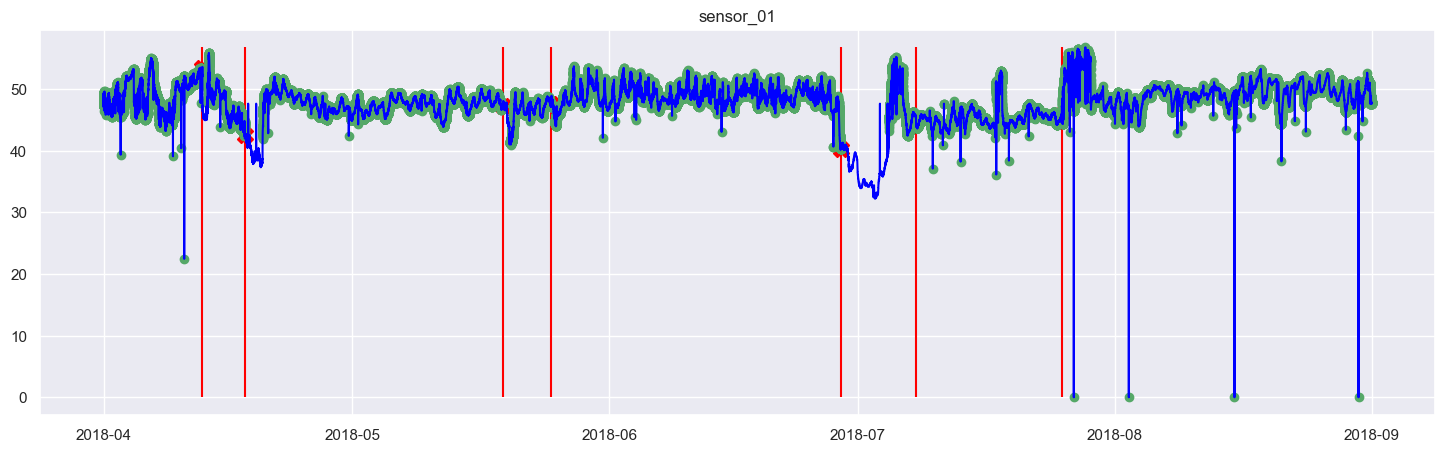

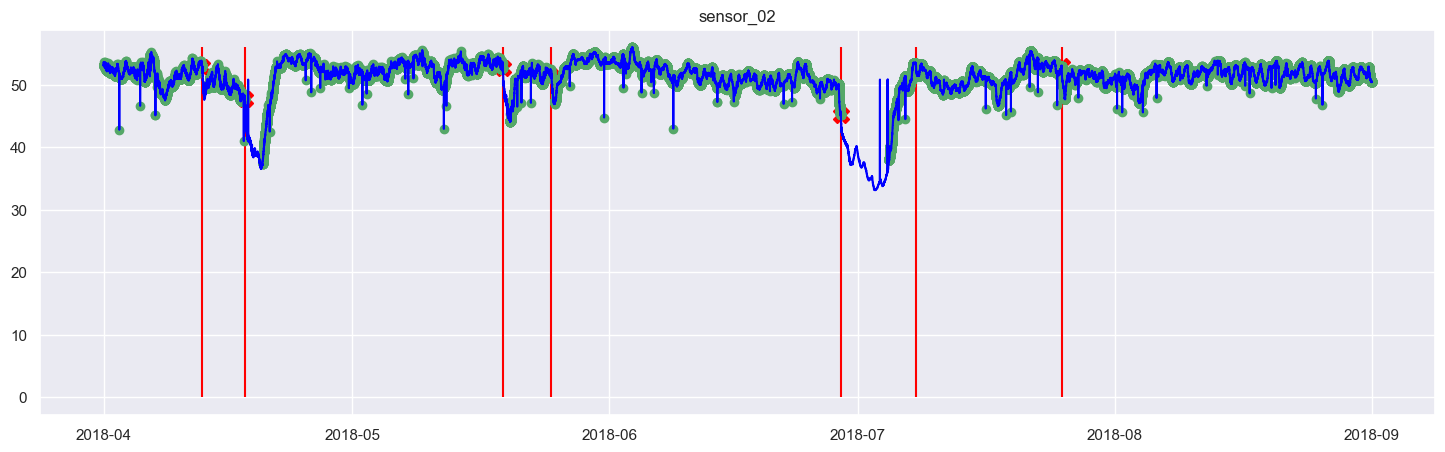

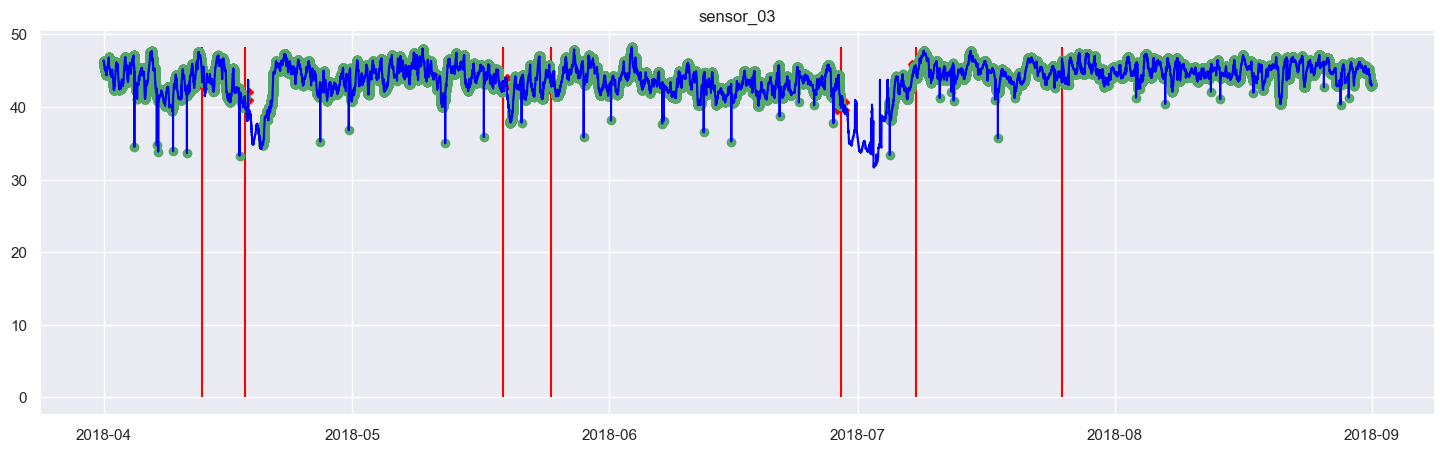

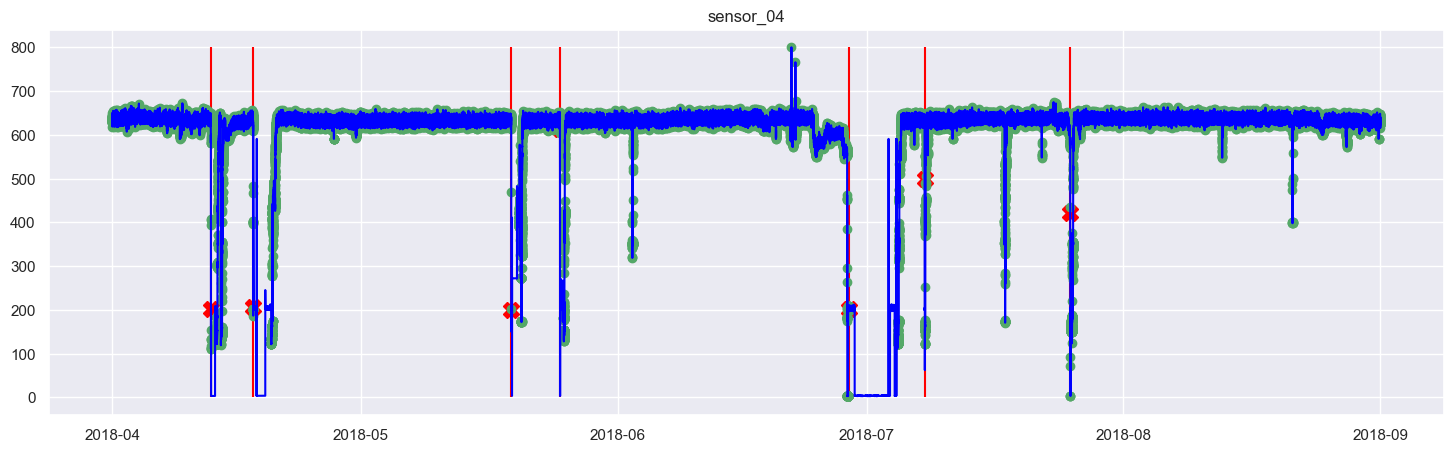

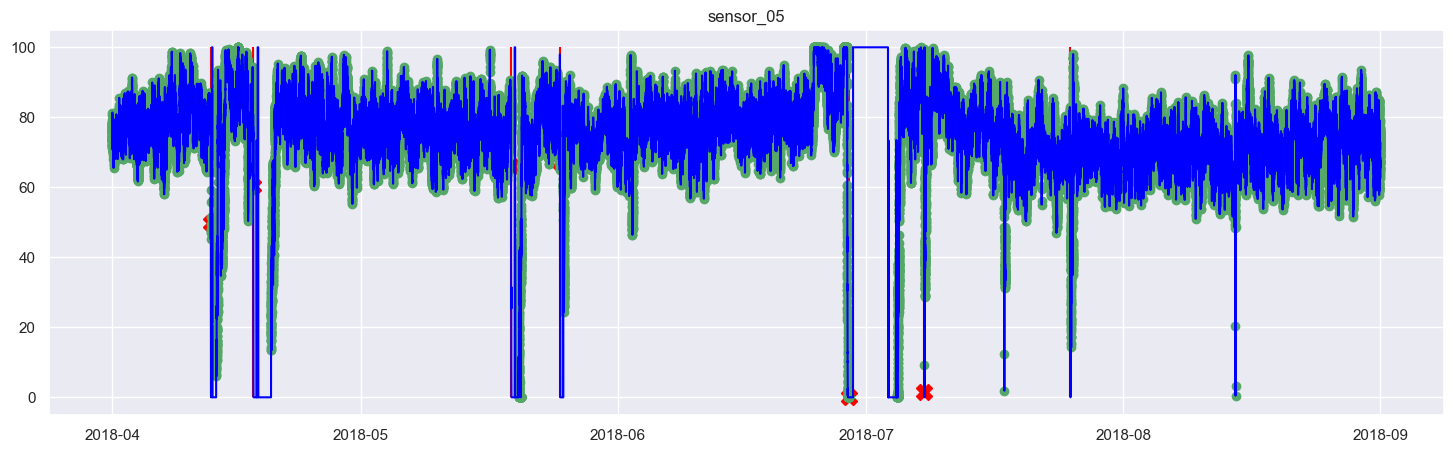

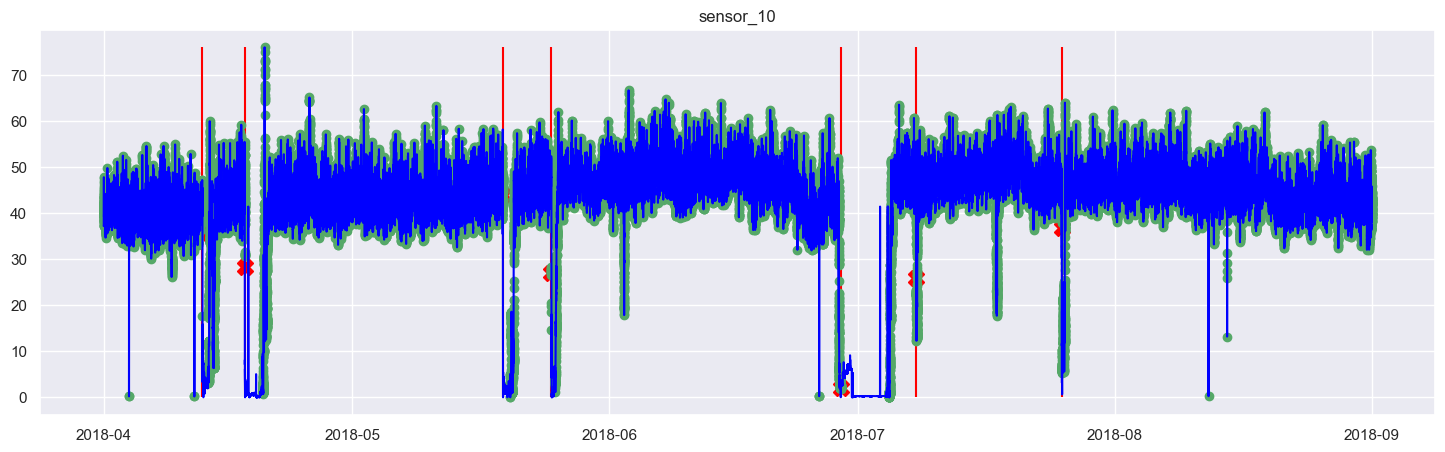

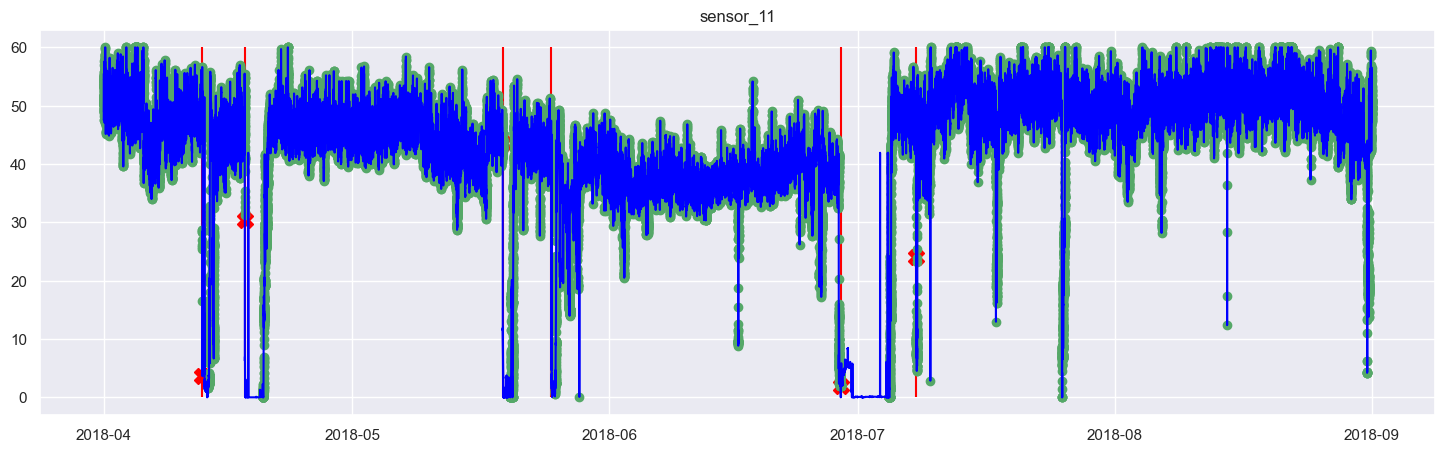

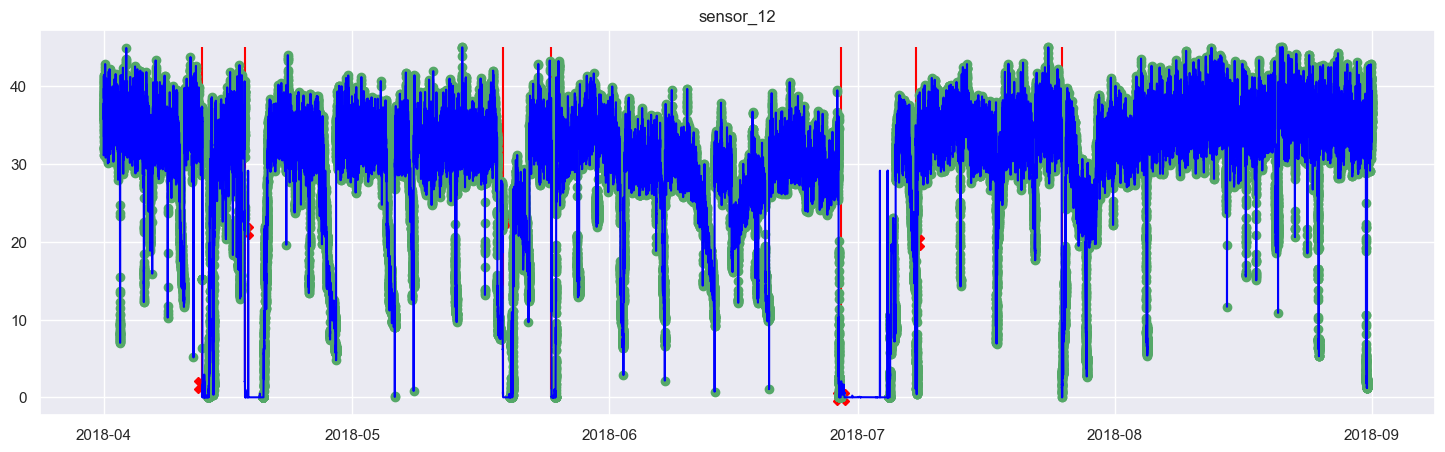

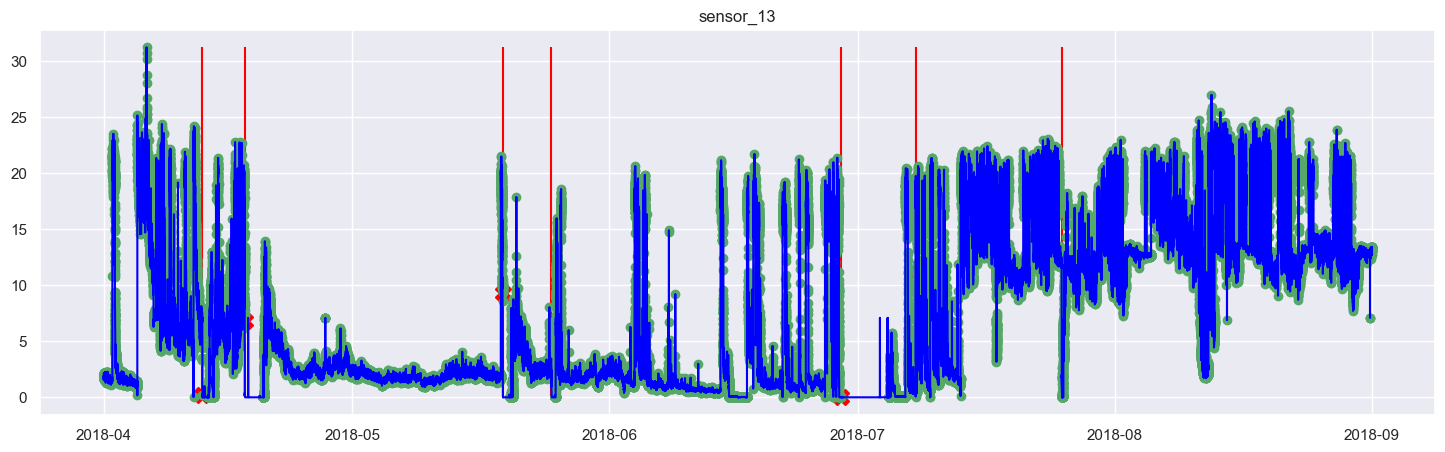

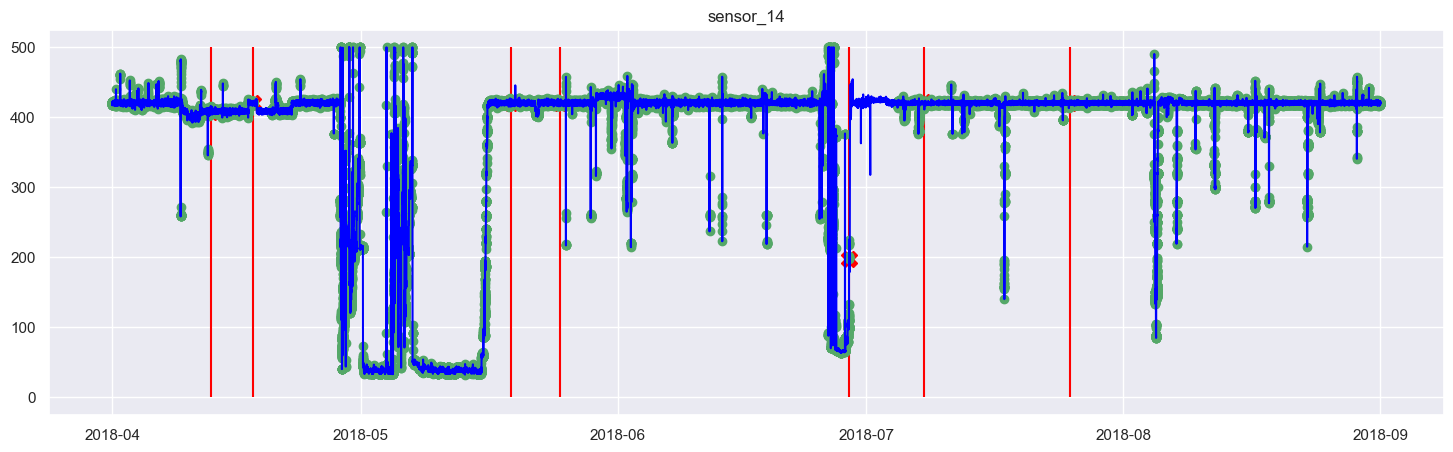

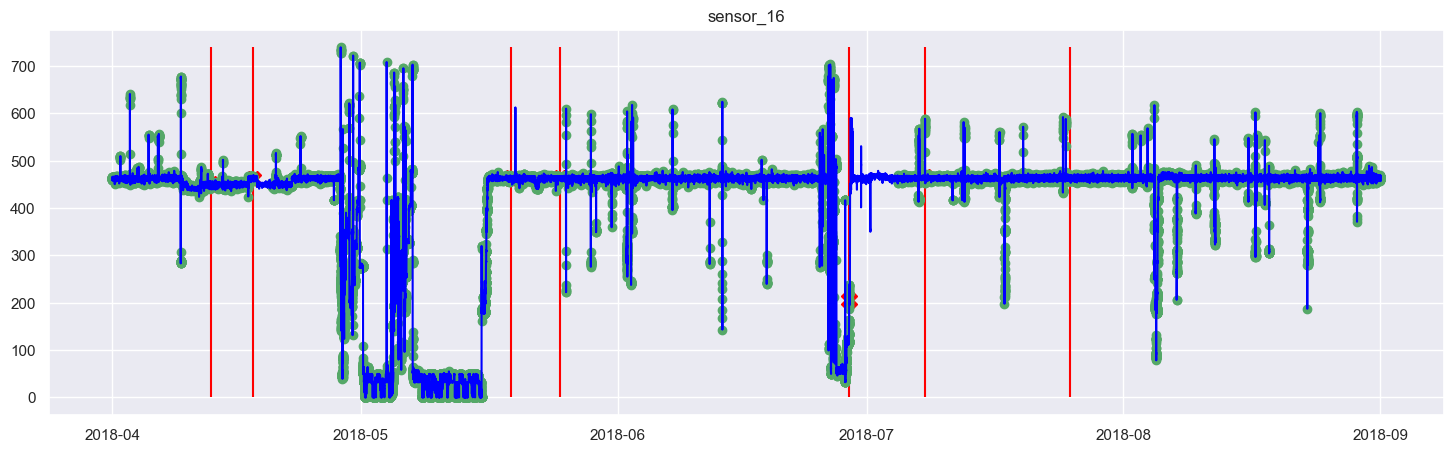

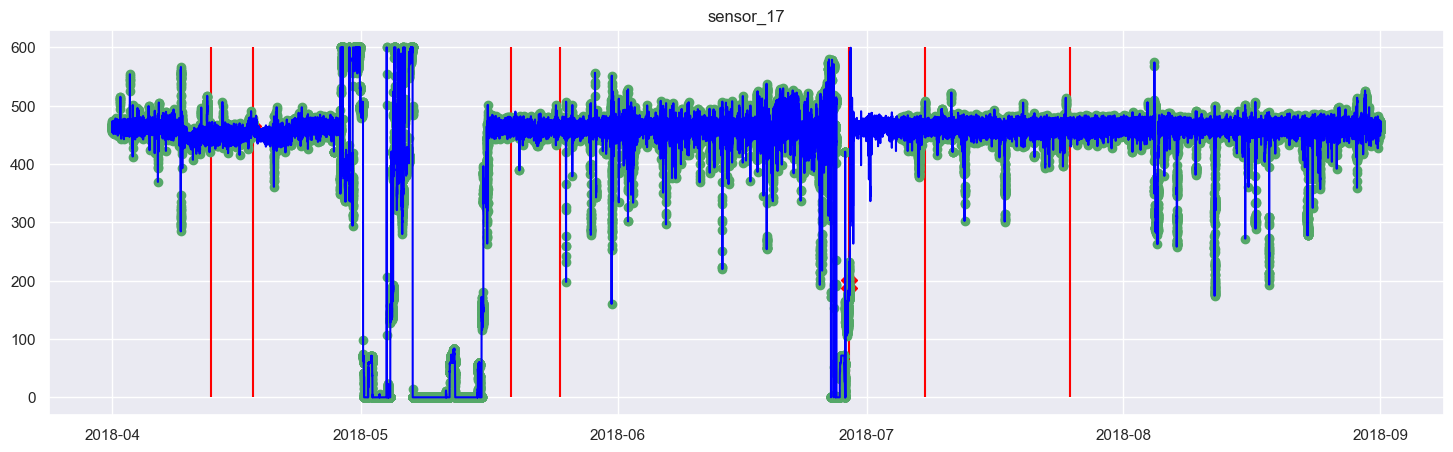

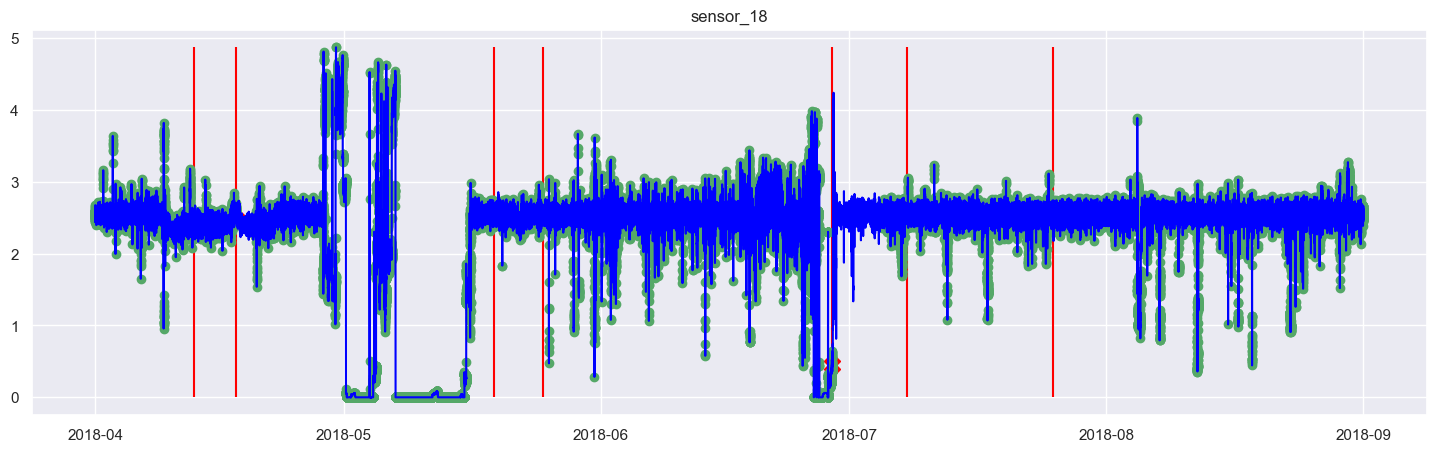

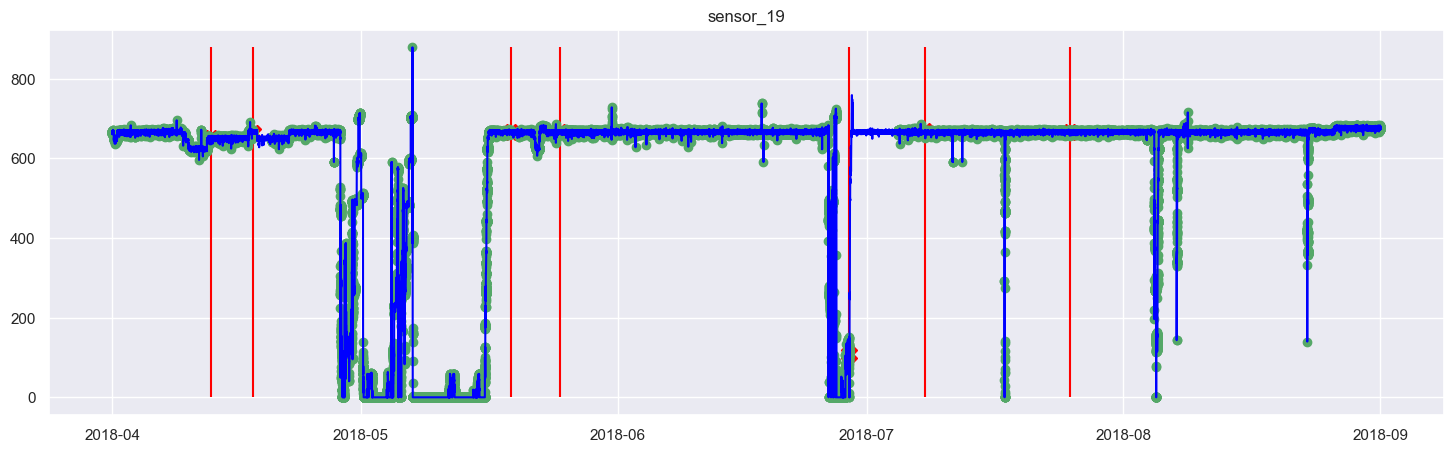

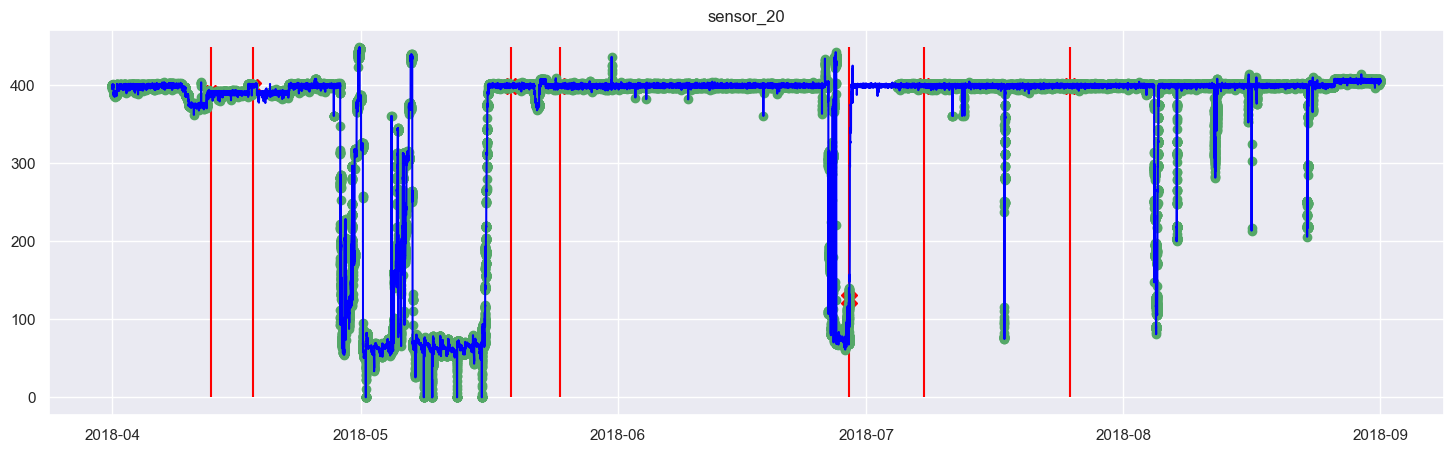

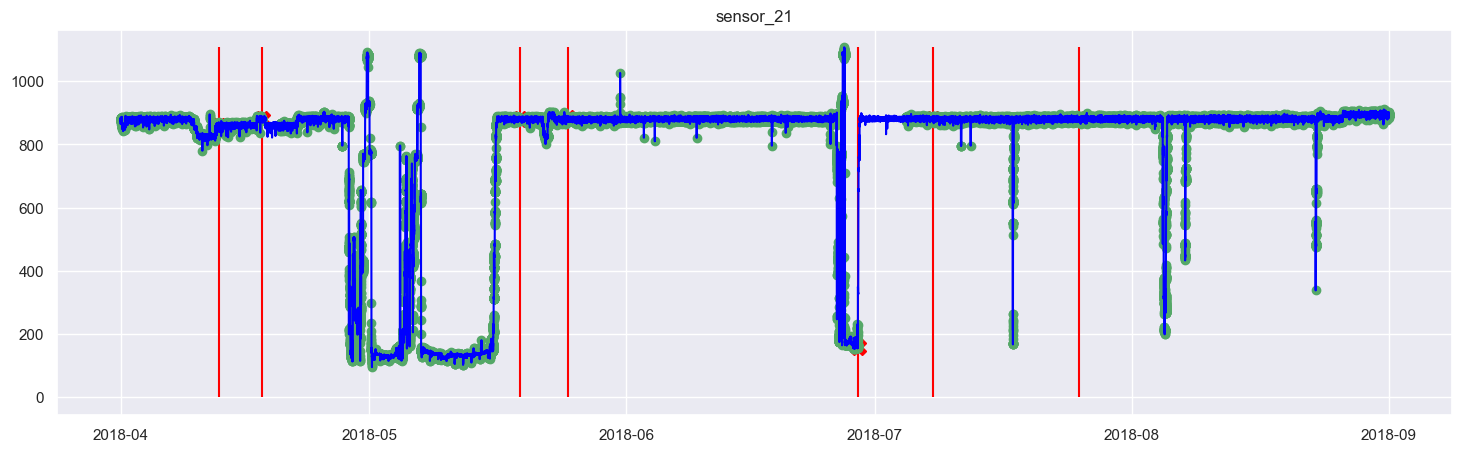

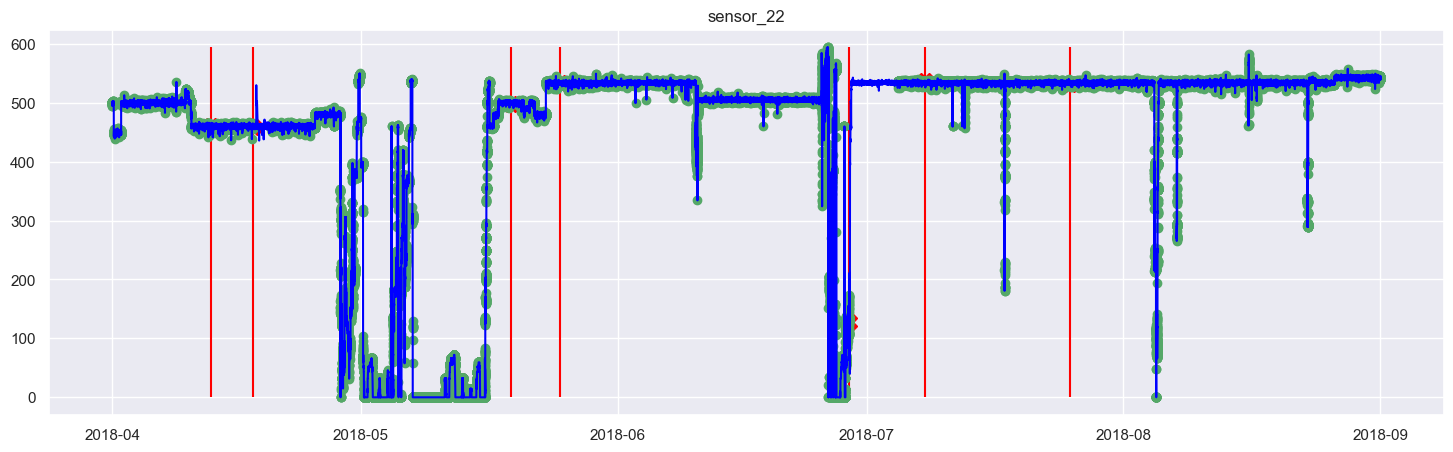

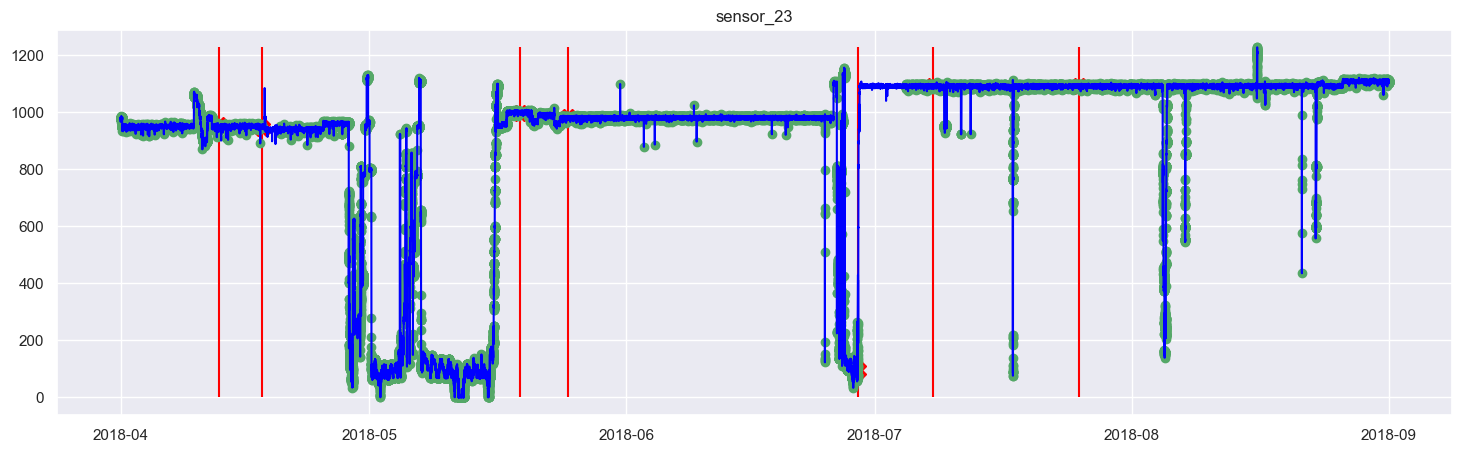

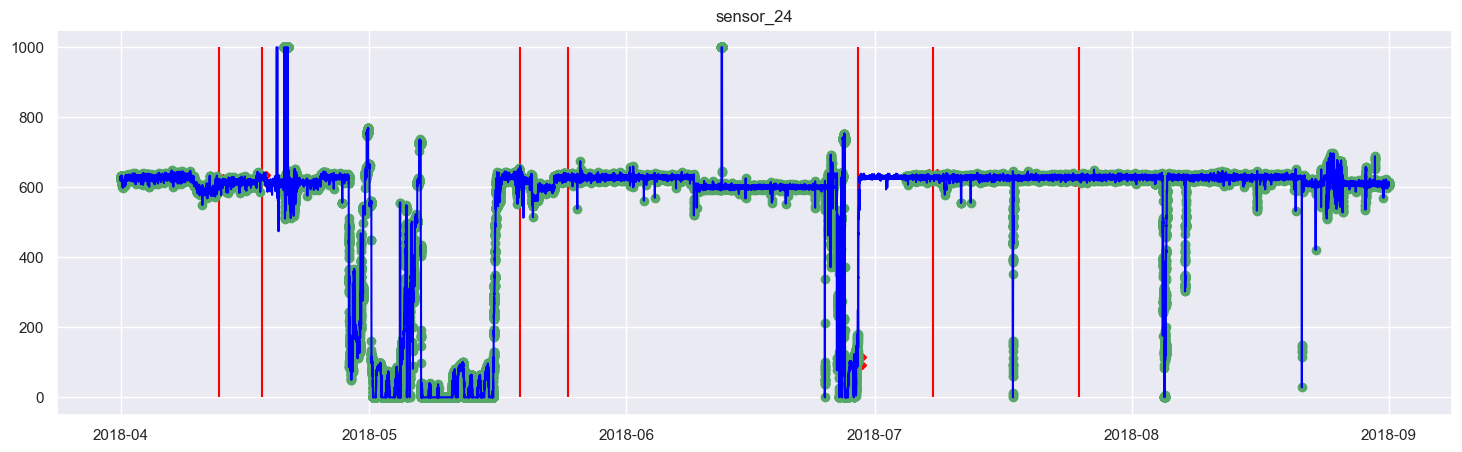

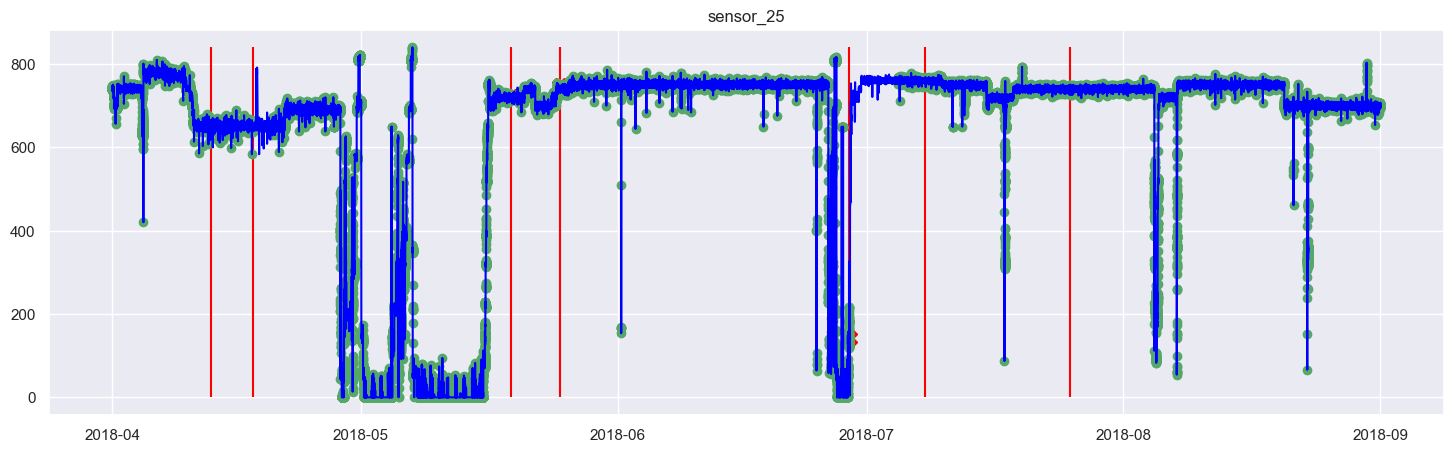

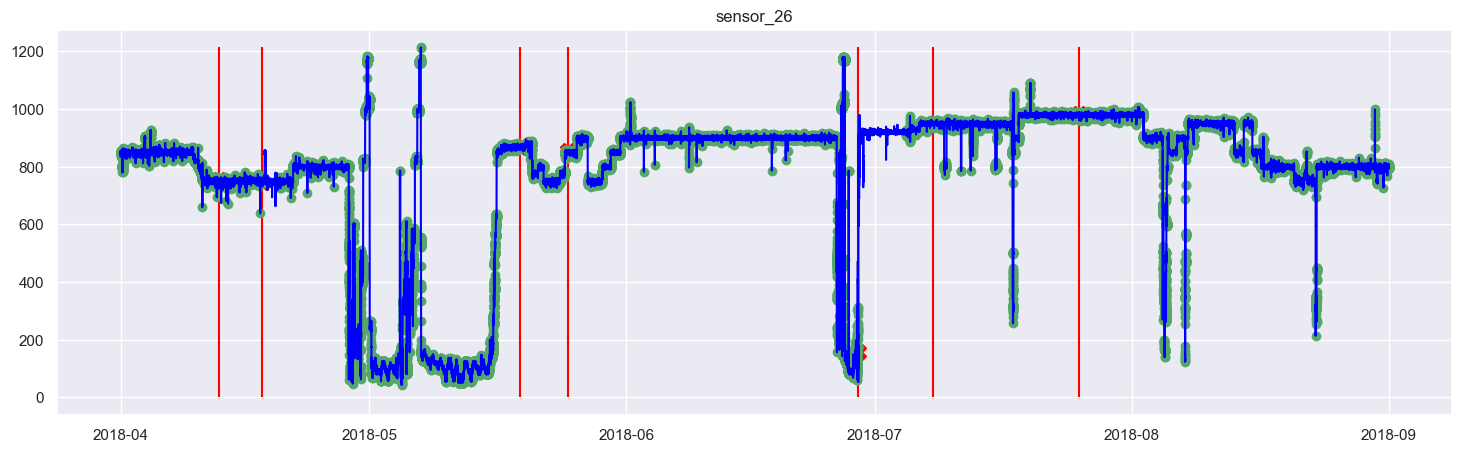

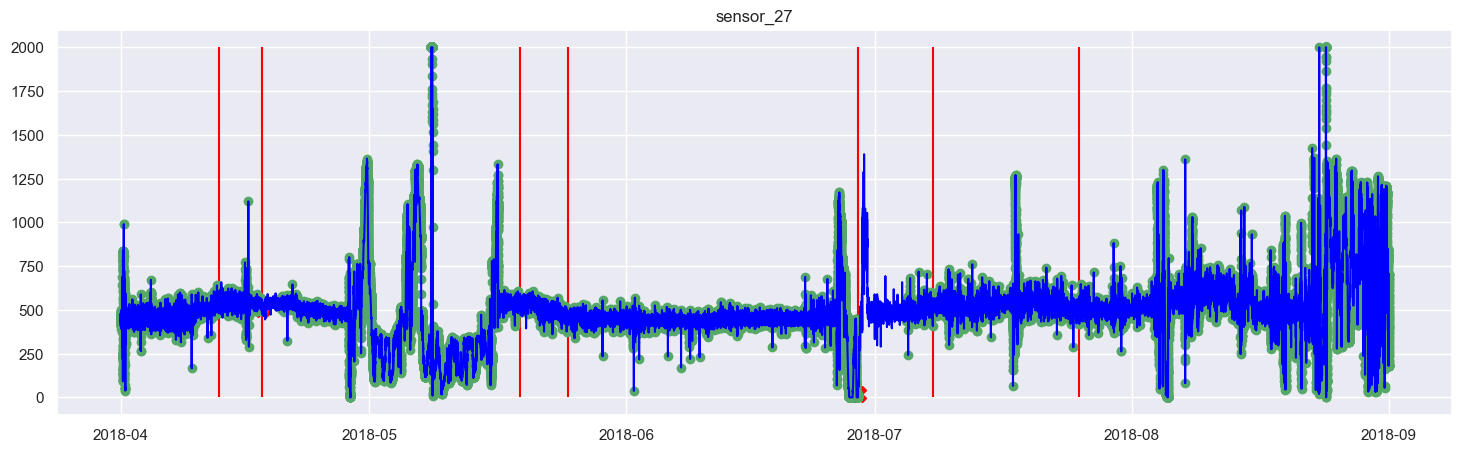

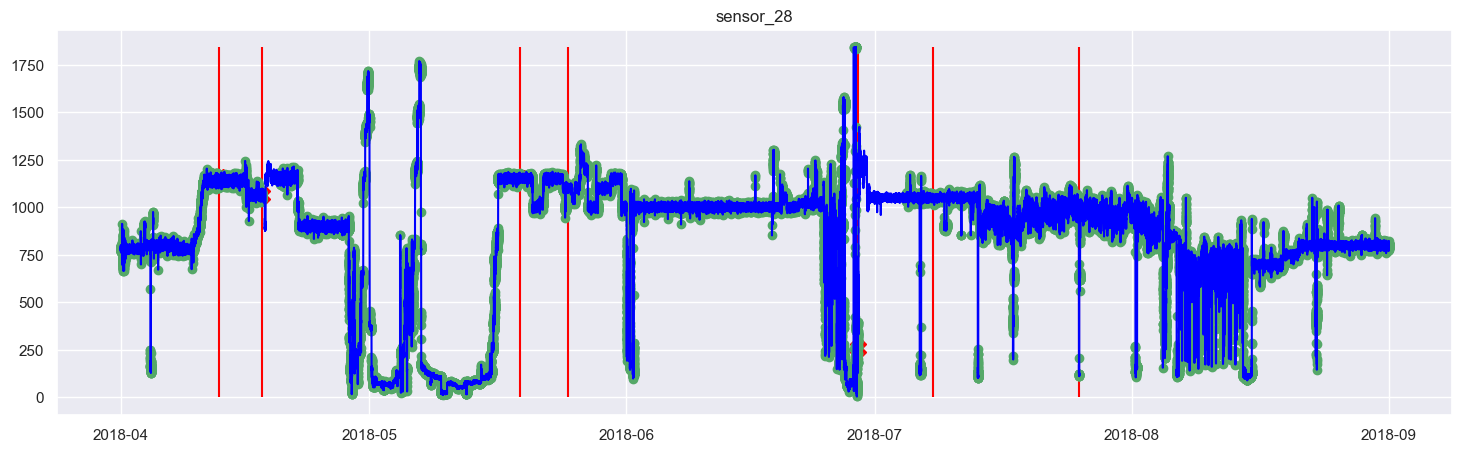

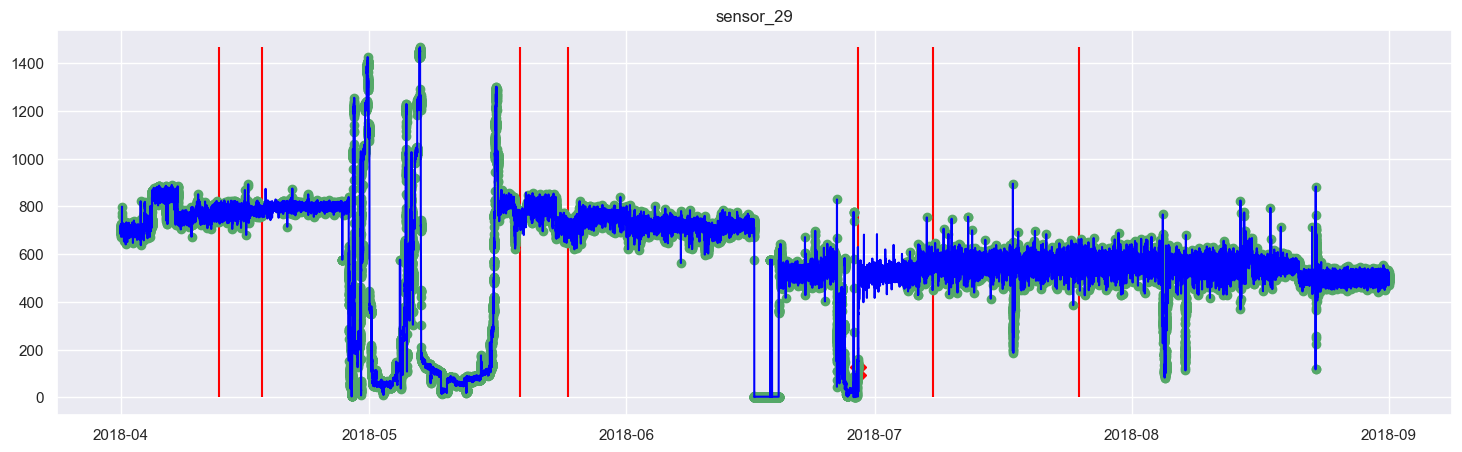

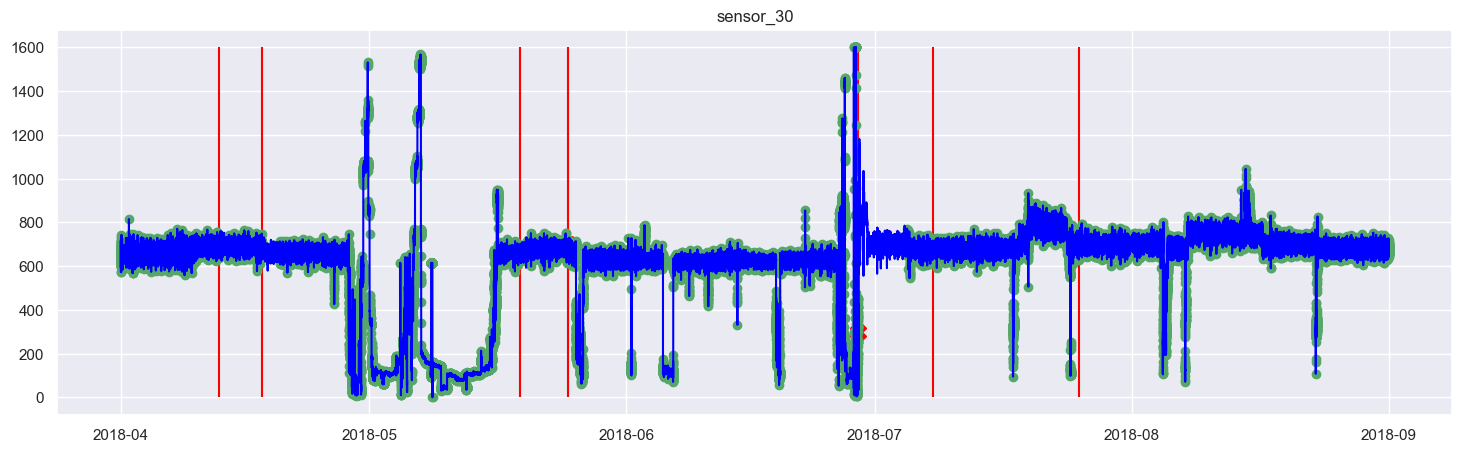

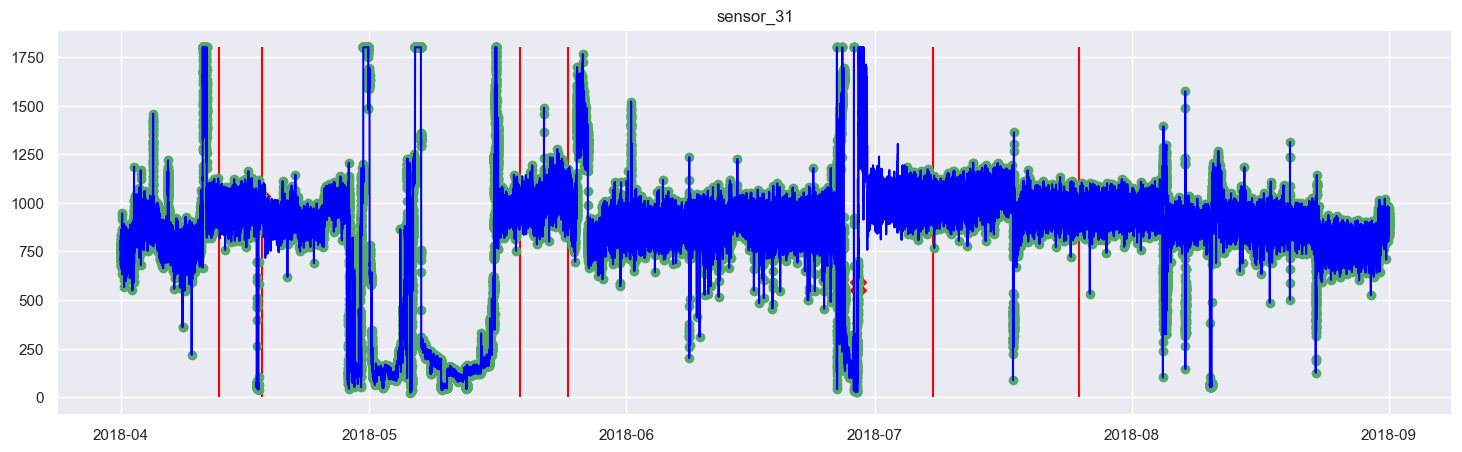

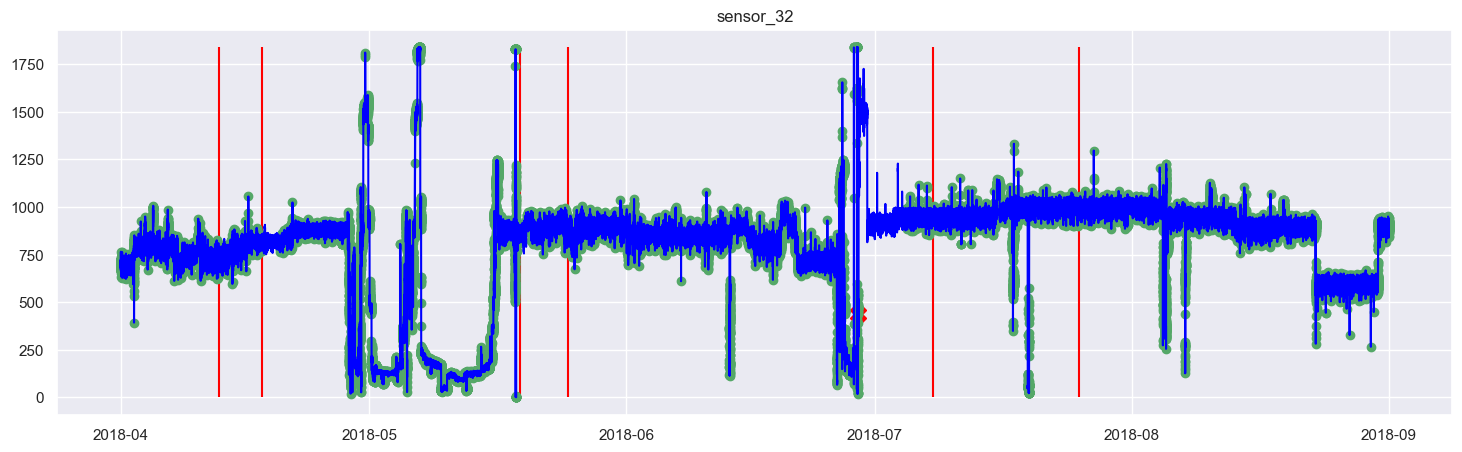

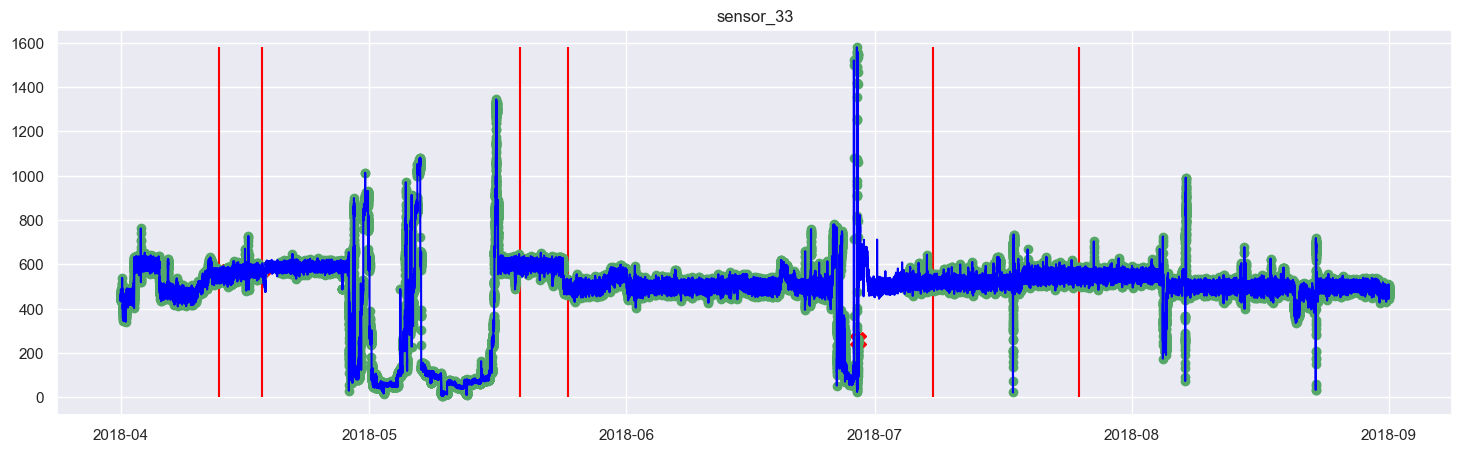

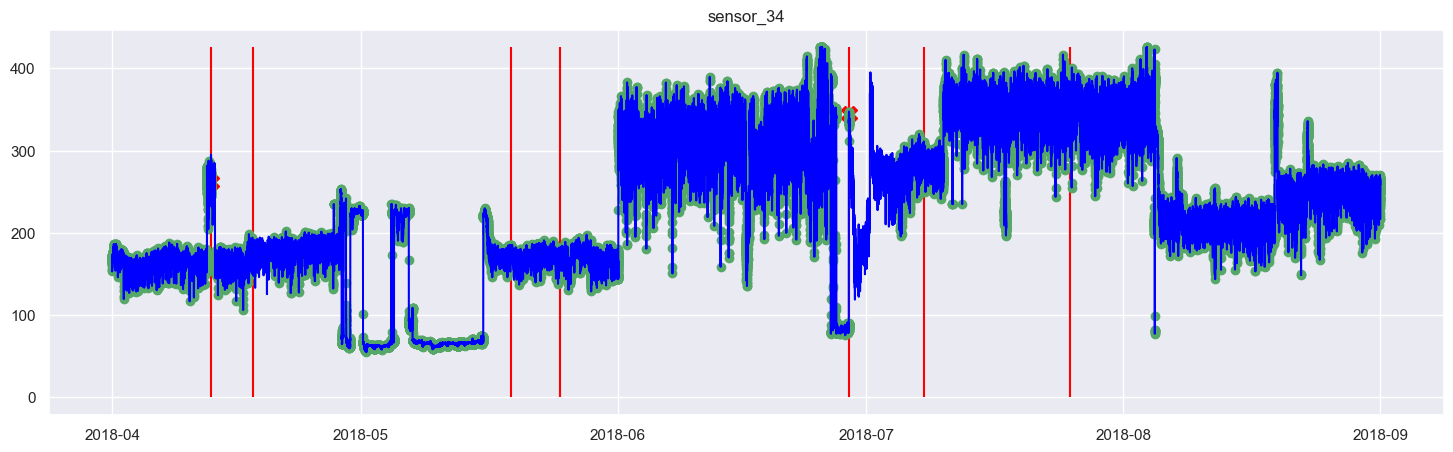

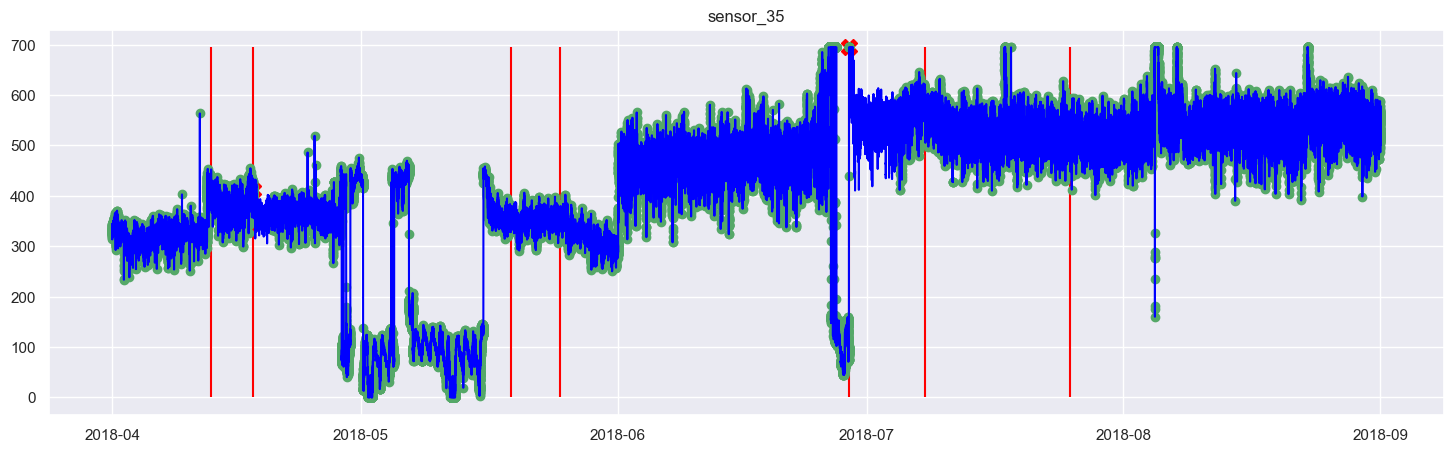

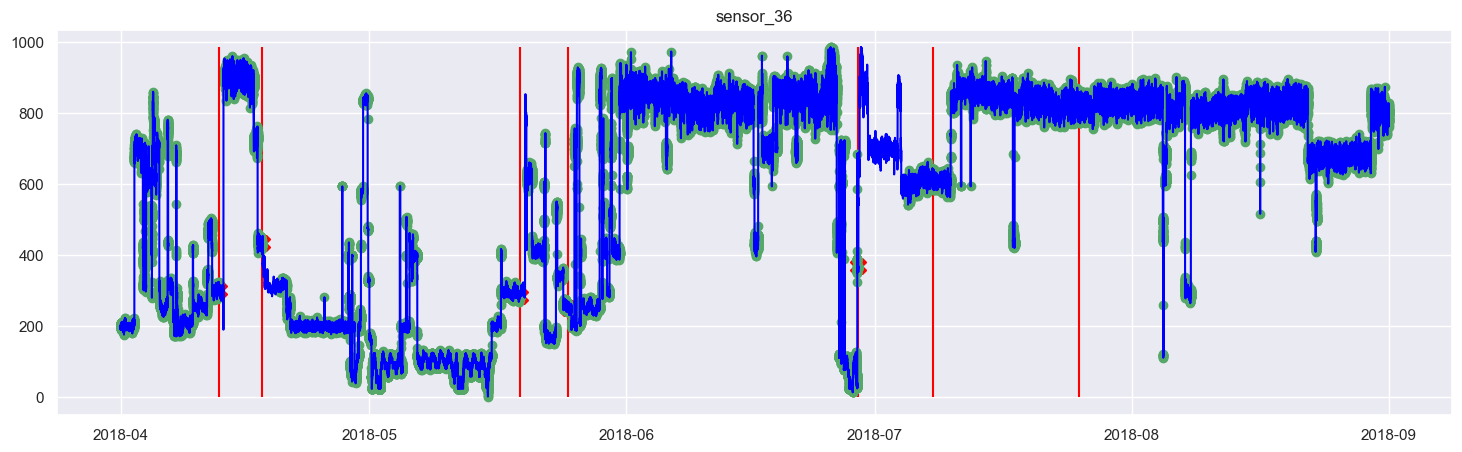

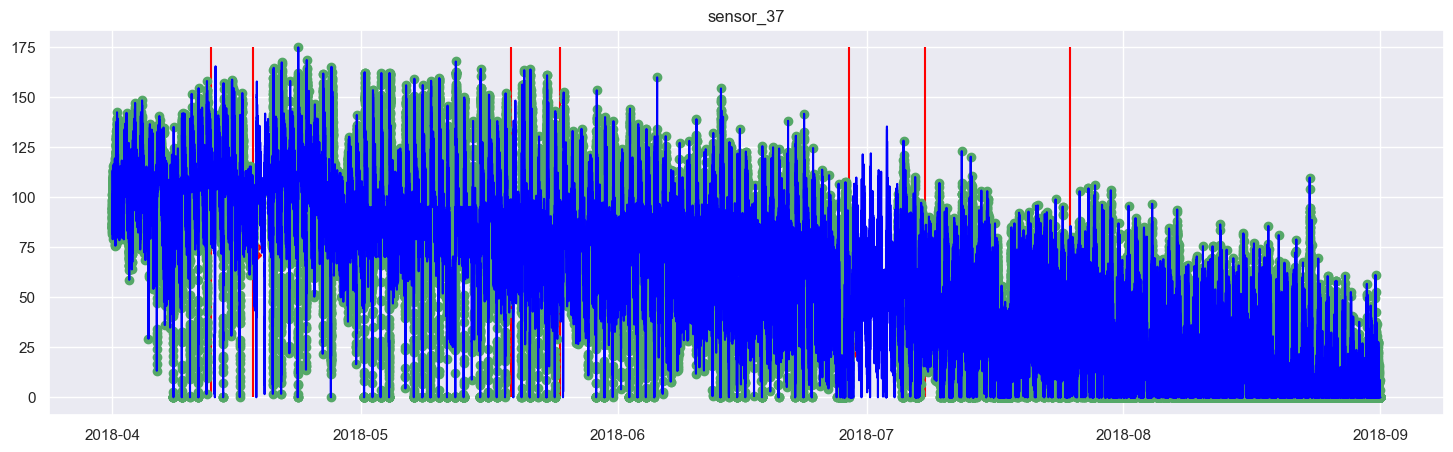

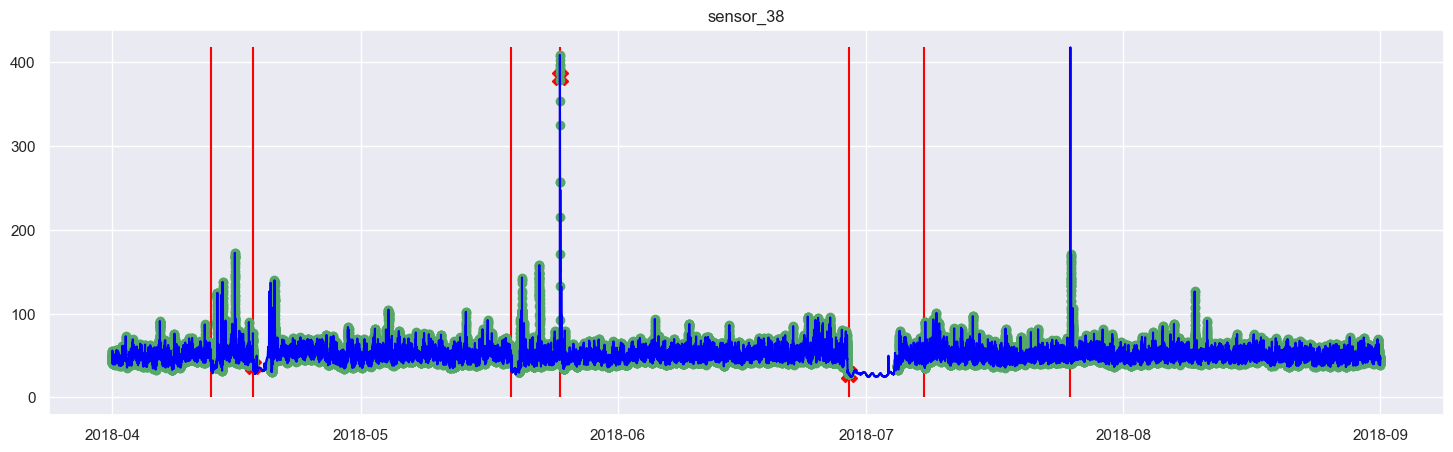

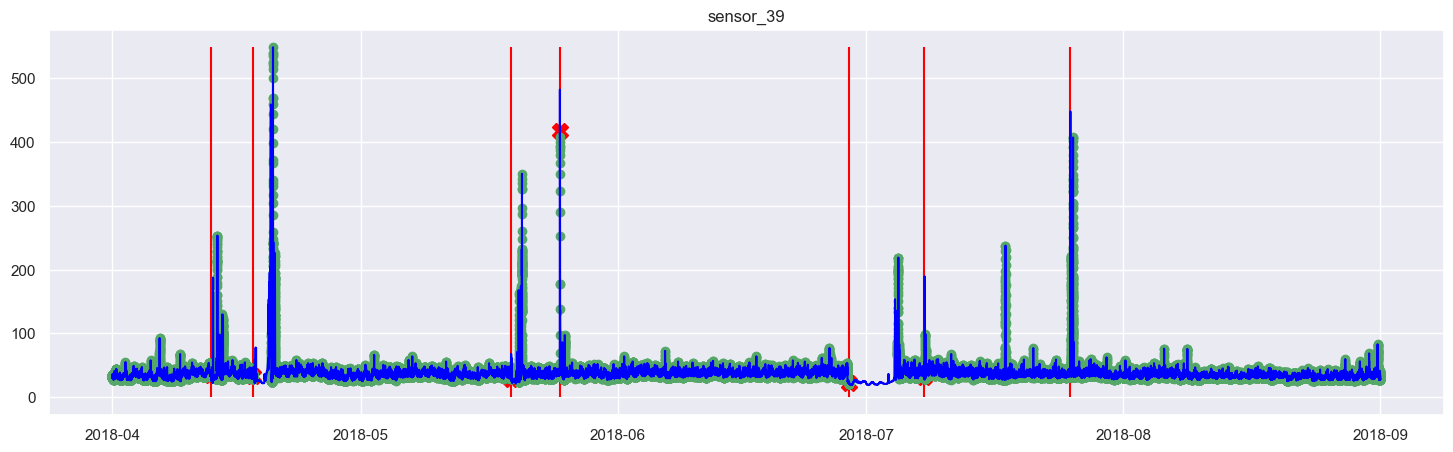

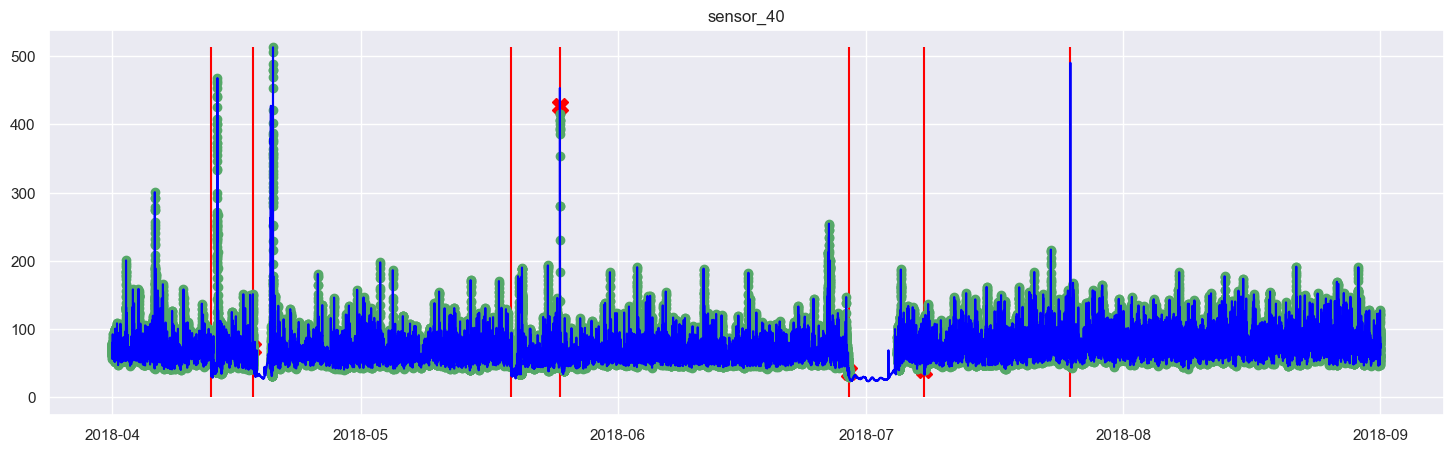

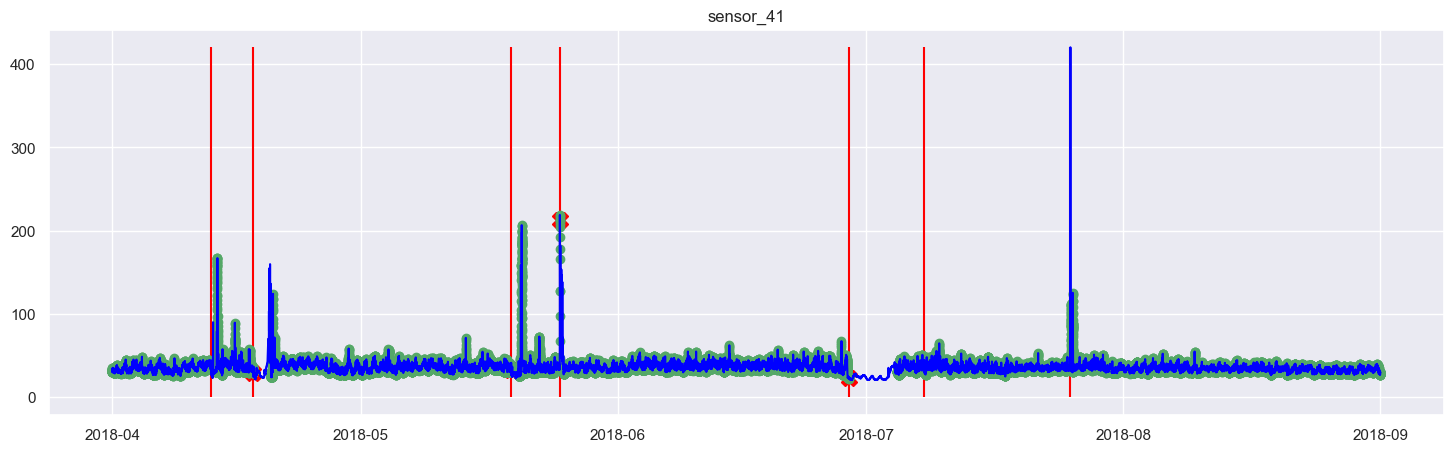

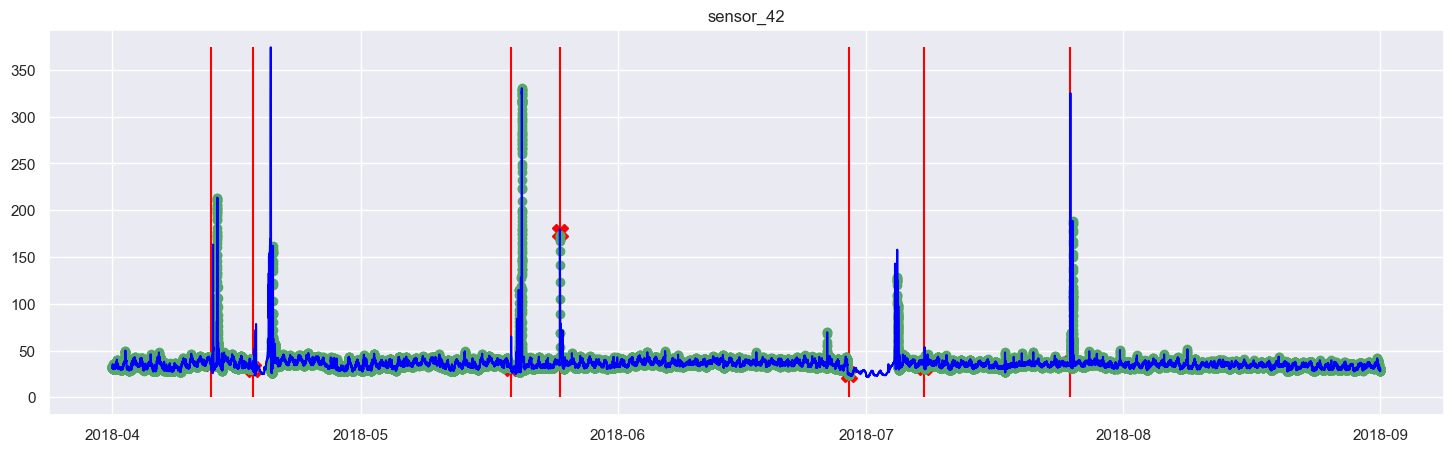

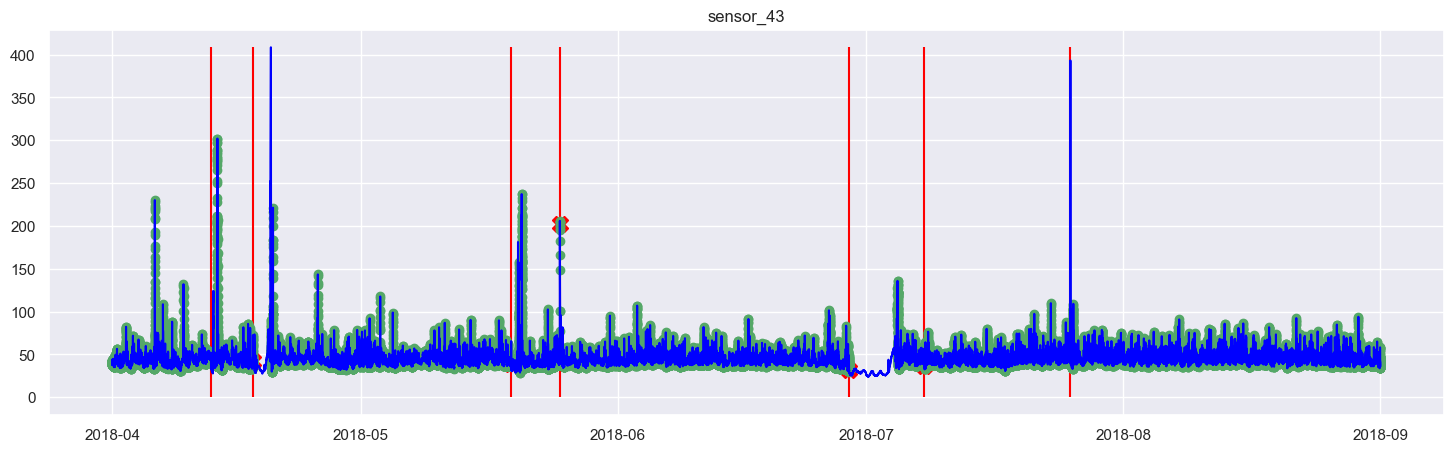

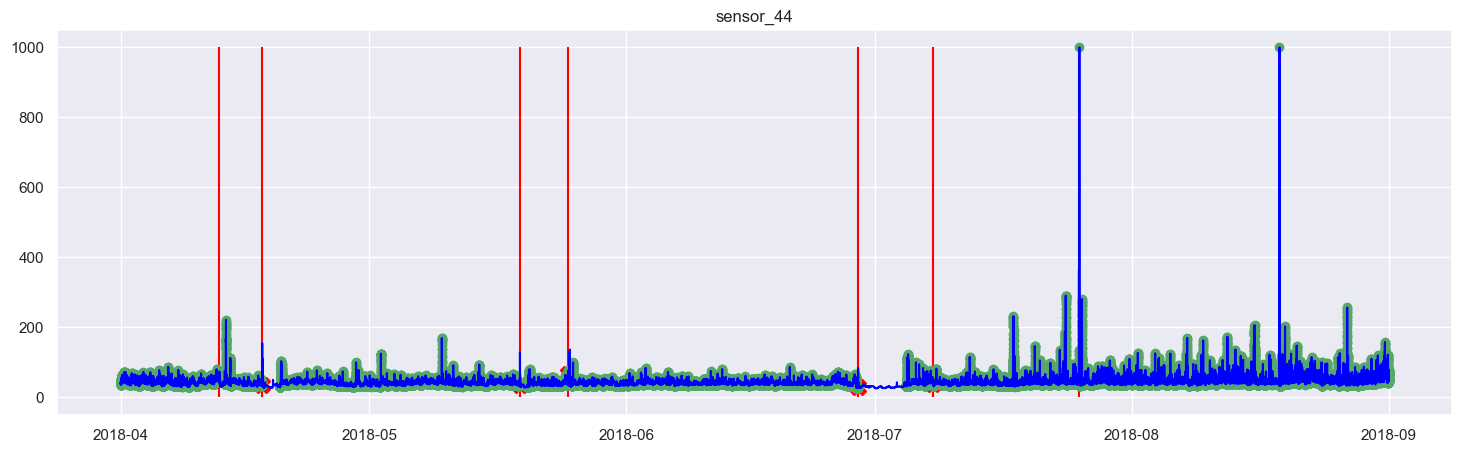

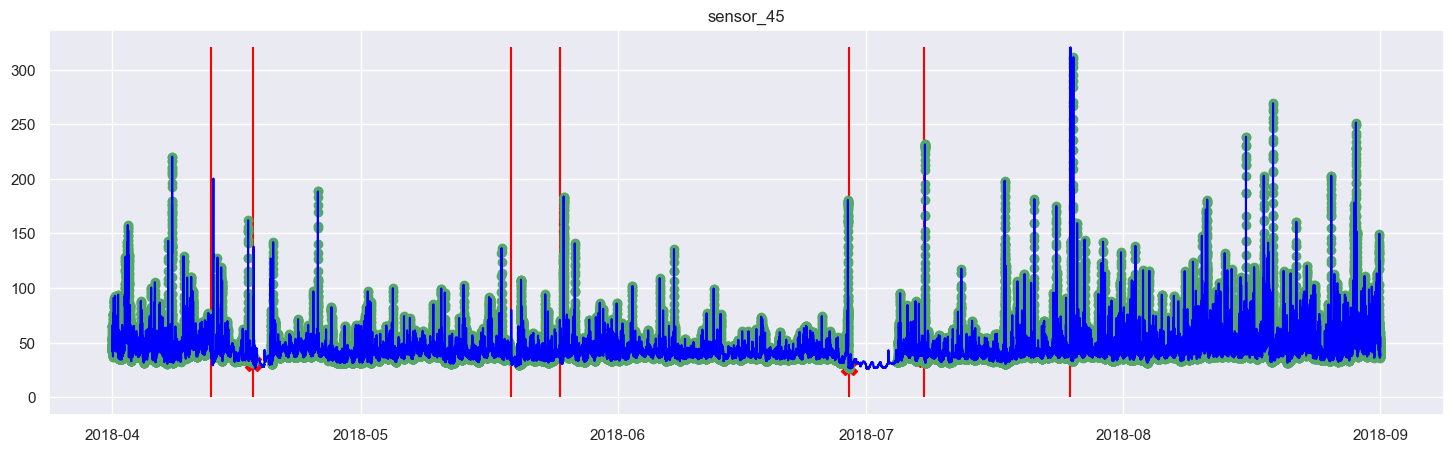

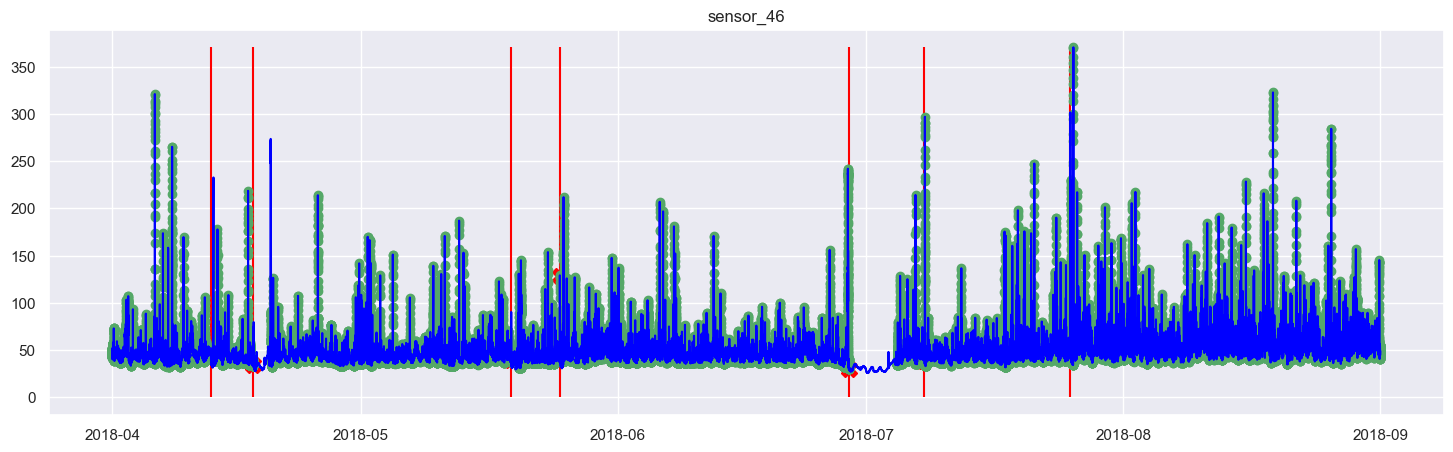

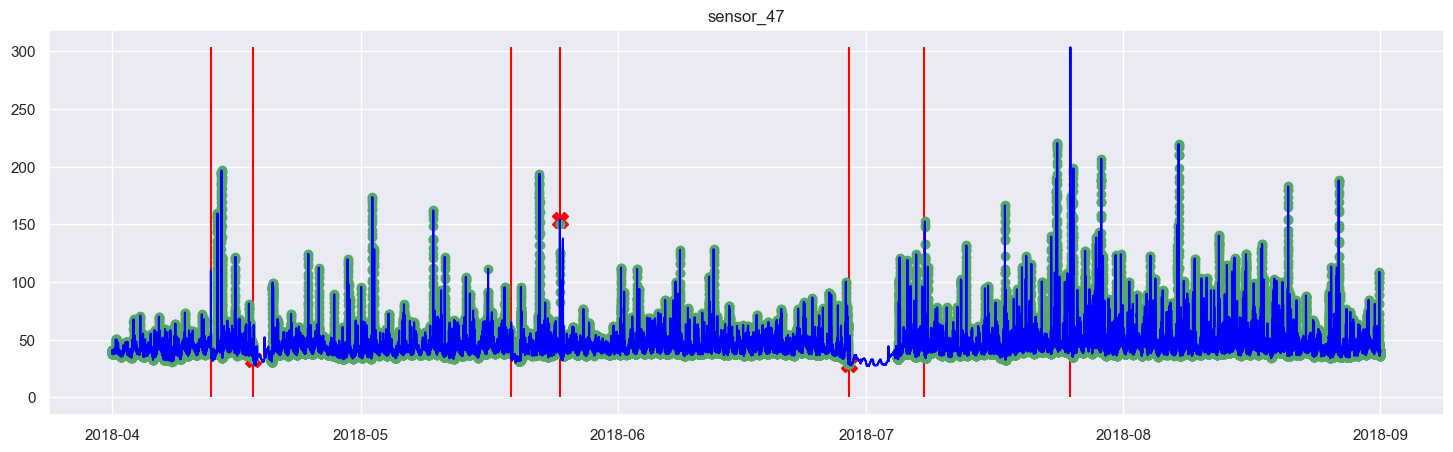

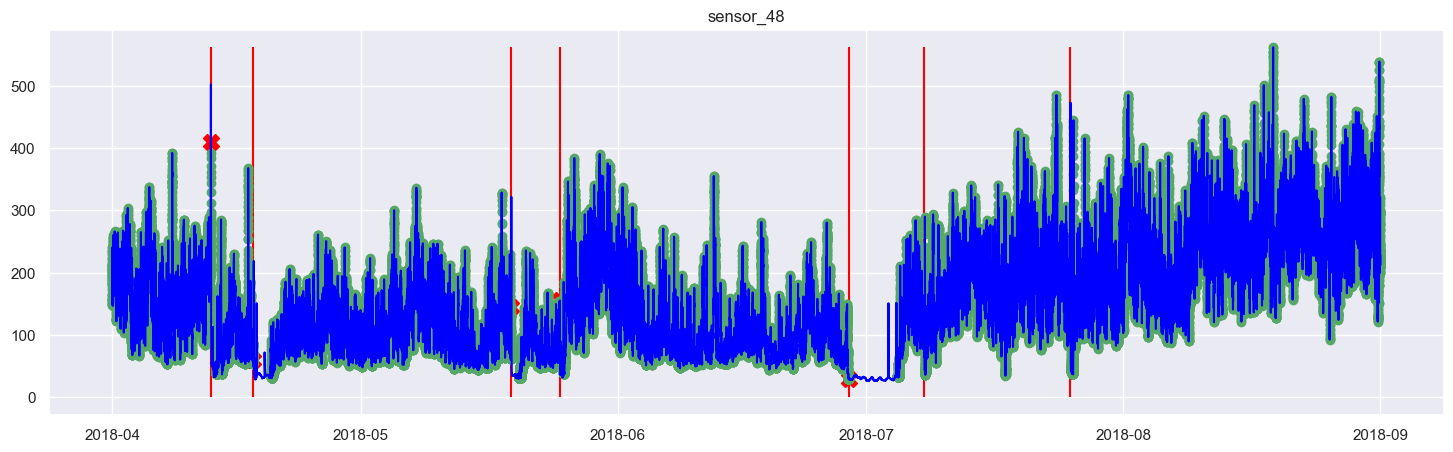

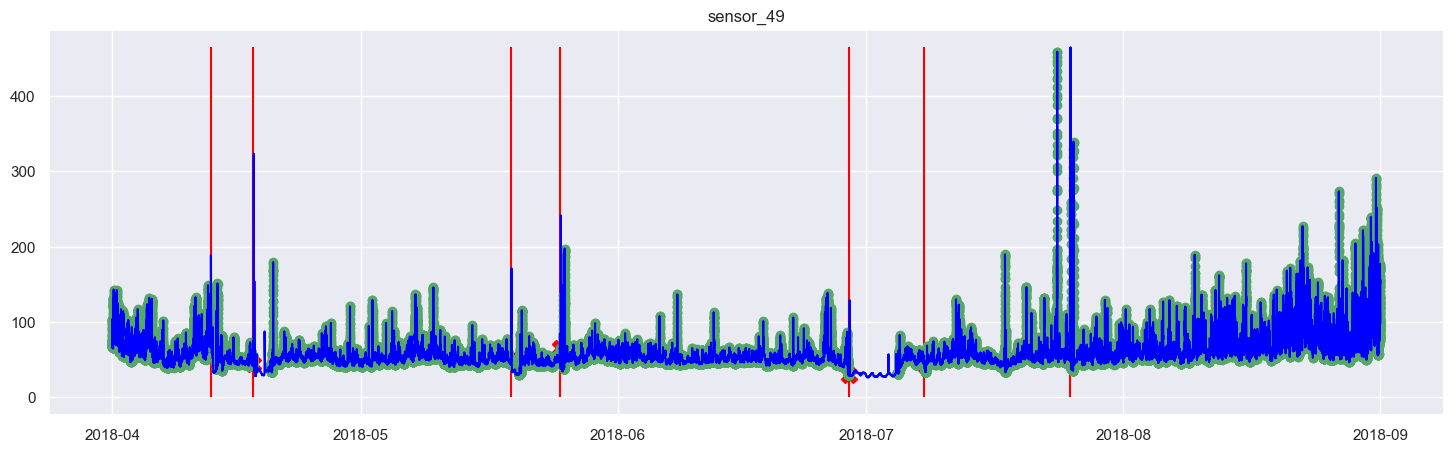

In [9]:
# Extract the readings from the BROKEN state of the pump
broken = pump_df[pump_df['machine_status']=='BROKEN']
normal = pump_df[pump_df['machine_status']=='NORMAL']

# Plot and compare the signals of 4 sensors

for name in pump_df.columns[0:44]:
    _ = plt.figure(figsize=(18,5))
    _ = plt.vlines(broken.index,0,pump_df[name].max(), linestyle='solid', color='red')
    _ = plt.plot(broken[name], linestyle='none', marker='X', color='red', markersize=12)
    _ = plt.plot(normal[name], linestyle='none', marker='o', color='g', markersize=6)
    _ = plt.plot(pump_df[name], color='blue')
    _ = plt.title(name)
    plt.show()
    
    



Within the plots, it can be appreciated that not all sensors exhibit spikes on the failure dates, so, it is important to select which ones are most important to detect the failures in advance. We will tackle this later with a PCA Analysis.

## 1.4 Data Preprocessing, Standarize, Reduce

In [10]:
from sklearn.preprocessing import StandardScaler

sensors = pump_df.drop('machine_status',axis = 1)

scaler = StandardScaler()
sensors_scaled = scaler.fit_transform(sensors)
sensors_scaled = pd.DataFrame(sensors_scaled, columns=sensors.columns)
sensors_scaled.head()

sensor_01  sensor_02  sensor_03  sensor_04  sensor_05  sensor_10  \
0  -0.151675   0.639386   1.057675   0.303443   0.177097  -0.350860   
1  -0.151675   0.639386   1.057675   0.303443   0.177097  -0.350860   
2  -0.072613   0.639386   1.093565   0.334786   0.008647  -0.297906   
3  -0.151675   0.627550   1.093564   0.260045   0.207693  -0.239029   
4  -0.138499   0.639386   1.093564   0.317909   0.184568  -0.163810   

   sensor_11  sensor_12  sensor_13  sensor_14  ...  sensor_40  sensor_41  \
0   0.429379   0.195797  -0.782084   0.377336  ...   0.080880  -0.553995   
1   0.429379   0.195797  -0.782084   0.377336  ...   0.080880  -0.553995   
2   0.479396   0.291884  -0.778154   0.388584  ...   0.032135  -0.619939   
3   0.516072   0.250679  -0.796852   0.387713  ...   0.153997  -0.619939   
4   0.547239   0.278346  -0.781725   0.380144  ...   0.373349  -0.553995   

   sensor_42  sensor_43  sensor_44  sensor_45  sensor_46  sensor_47  \
0  -0.358970  -0.176799  -0.260520   1.759633   0.185888  -0.588642   
1  -0.358970  -0.176799  -0.260520   1.759633   0.185888  -0.588642   
2  -0.358970  -0.200379  -0.285516   1.737092   0.204388  -0.588641   
3  -0.384354  -0.271121  -0.310513   1.692010   0.204388  -0.588642   
4  -0.384354  -0.223959  -0.335509   1.714550   0.241389  -0.533219   

   sensor_48  sensor_49  
0   0.086297   0.553138  
1   0.086297   0.553138  
2   0.061668   0.522906  
3   0.061668   0.507790  
4   0.089816   0.492674  

[5 rows x 44 columns]

In [11]:
# The target is a categorical variable with 3 possible values.
# We can use either OrdinalEncoder or OneHorEncoder from Scikit learn to process it properly
from sklearn.preprocessing import OrdinalEncoder
ord_encoder = OrdinalEncoder()

target_one_hot = ord_encoder.fit_transform(pump_df.machine_status.values.reshape(-1,1))
target_one_hot

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [12]:
sensors_scaled['target_one_hot'] = target_one_hot
sensors_scaled.to_csv('sensors_scaled.csv')
sensors_scaled.head()

sensor_01  sensor_02  sensor_03  sensor_04  sensor_05  sensor_10  \
0  -0.151675   0.639386   1.057675   0.303443   0.177097  -0.350860   
1  -0.151675   0.639386   1.057675   0.303443   0.177097  -0.350860   
2  -0.072613   0.639386   1.093565   0.334786   0.008647  -0.297906   
3  -0.151675   0.627550   1.093564   0.260045   0.207693  -0.239029   
4  -0.138499   0.639386   1.093564   0.317909   0.184568  -0.163810   

   sensor_11  sensor_12  sensor_13  sensor_14  ...  sensor_41  sensor_42  \
0   0.429379   0.195797  -0.782084   0.377336  ...  -0.553995  -0.358970   
1   0.429379   0.195797  -0.782084   0.377336  ...  -0.553995  -0.358970   
2   0.479396   0.291884  -0.778154   0.388584  ...  -0.619939  -0.358970   
3   0.516072   0.250679  -0.796852   0.387713  ...  -0.619939  -0.384354   
4   0.547239   0.278346  -0.781725   0.380144  ...  -0.553995  -0.384354   

   sensor_43  sensor_44  sensor_45  sensor_46  sensor_47  sensor_48  \
0  -0.176799  -0.260520   1.759633   0.185888  -0.588642   0.086297   
1  -0.176799  -0.260520   1.759633   0.185888  -0.588642   0.086297   
2  -0.200379  -0.285516   1.737092   0.204388  -0.588641   0.061668   
3  -0.271121  -0.310513   1.692010   0.204388  -0.588642   0.061668   
4  -0.223959  -0.335509   1.714550   0.241389  -0.533219   0.089816   

   sensor_49  target_one_hot  
0   0.553138             1.0  
1   0.553138             1.0  
2   0.522906             1.0  
3   0.507790             1.0  
4   0.492674             1.0  

[5 rows x 45 columns]

array([[<AxesSubplot: xlabel='sensor_01', ylabel='sensor_01'>,
        <AxesSubplot: xlabel='sensor_02', ylabel='sensor_01'>,
        <AxesSubplot: xlabel='sensor_03', ylabel='sensor_01'>,
        <AxesSubplot: xlabel='sensor_04', ylabel='sensor_01'>],
       [<AxesSubplot: xlabel='sensor_01', ylabel='sensor_02'>,
        <AxesSubplot: xlabel='sensor_02', ylabel='sensor_02'>,
        <AxesSubplot: xlabel='sensor_03', ylabel='sensor_02'>,
        <AxesSubplot: xlabel='sensor_04', ylabel='sensor_02'>],
       [<AxesSubplot: xlabel='sensor_01', ylabel='sensor_03'>,
        <AxesSubplot: xlabel='sensor_02', ylabel='sensor_03'>,
        <AxesSubplot: xlabel='sensor_03', ylabel='sensor_03'>,
        <AxesSubplot: xlabel='sensor_04', ylabel='sensor_03'>],
       [<AxesSubplot: xlabel='sensor_01', ylabel='sensor_04'>,
        <AxesSubplot: xlabel='sensor_02', ylabel='sensor_04'>,
        <AxesSubplot: xlabel='sensor_03', ylabel='sensor_04'>,
        <AxesSubplot: xlabel='sensor_04', ylabel='se

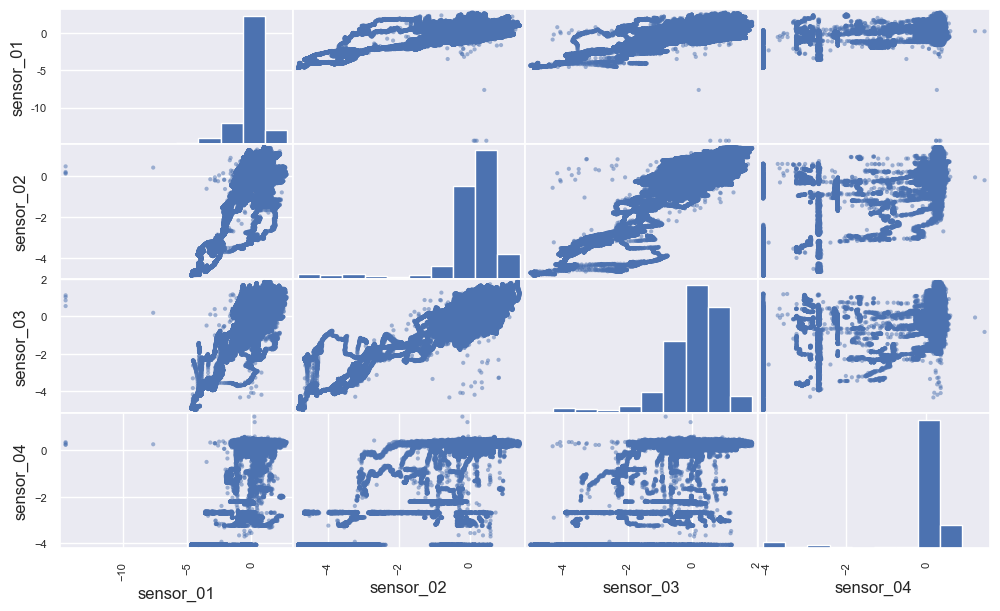

In [13]:
from pandas.plotting import scatter_matrix

scatter_matrix(sensors_scaled.iloc[:,0:4], figsize = (12,7))

In the reduced scatter matrix quite a few relationhips can be infered at first glance, sensor_02 has a linear relation with sensor_04.

In order to reduce dimensionality a PCA analysis is required.

## 1.5 PCA Analysis

In [5]:
sensors_scaled = pd.read_csv('sensors_scaled.csv')

In [7]:
sensors_scaled.iloc[:,1:-1]

sensor_01  sensor_02  sensor_03  sensor_04  sensor_05  sensor_10  \
0       -0.151675   0.639386   1.057675   0.303443   0.177097  -0.350860   
1       -0.151675   0.639386   1.057675   0.303443   0.177097  -0.350860   
2       -0.072613   0.639386   1.093565   0.334786   0.008647  -0.297906   
3       -0.151675   0.627550   1.093564   0.260045   0.207693  -0.239029   
4       -0.138499   0.639386   1.093564   0.317909   0.184568  -0.163810   
...           ...        ...        ...        ...        ...        ...   
220315   0.032800  -0.094517  -0.252243   0.305854  -0.509061   0.140620   
220316   0.032800  -0.082678  -0.252243   0.279333  -0.437219   0.143889   
220317   0.032800  -0.094517  -0.252243   0.244776  -0.352766   0.137106   
220318   0.032800  -0.094517  -0.252243   0.312283  -0.480109   0.073358   
220319   0.032800  -0.094517  -0.252243   0.341215  -0.459031   0.095742   

        sensor_11  sensor_12  sensor_13  sensor_14  ...  sensor_40  sensor_41  \
0        0.429379   0.195797  -0.782084   0.377336  ...   0.080880  -0.553995   
1        0.429379   0.195797  -0.782084   0.377336  ...   0.080880  -0.553995   
2        0.479396   0.291884  -0.778154   0.388584  ...   0.032135  -0.619939   
3        0.516072   0.250679  -0.796852   0.387713  ...   0.153997  -0.619939   
4        0.547239   0.278346  -0.781725   0.380144  ...   0.373349  -0.553995   
...           ...        ...        ...        ...  ...        ...        ...   
220315   0.937681   0.881721   0.896402   0.388153  ...   0.129625  -0.619939   
220316   0.965676   0.929243   0.893062   0.400145  ...   0.202742  -0.652911   
220317   1.011002   0.928445   0.885294   0.383006  ...   0.385535  -0.685882   
220318   1.078054   0.964517   0.883091   0.386128  ...   0.458652  -0.685882   
220319   1.116597   1.015733   0.876204   0.391764  ...   0.422094  -0.685882   

        sensor_42  sensor_43  sensor_44  sensor_45  sensor_46  sensor_47  \
0       -0.358970  -0.176799  -0.260520   1.759633   0.185888  -0.588642   
1       -0.358970  -0.176799  -0.260520   1.759633   0.185888  -0.588642   
2       -0.358970  -0.200379  -0.285516   1.737092   0.204388  -0.588641   
3       -0.384354  -0.271121  -0.310513   1.692010   0.204388  -0.588642   
4       -0.384354  -0.223959  -0.335509   1.714550   0.241389  -0.533219   
...           ...        ...        ...        ...        ...        ...   
220315  -0.511277  -0.506926   2.214150   0.722747   0.019384  -0.311532   
220316  -0.536661  -0.506926   2.089167   0.587502   0.000884  -0.339242   
220317  -0.511277  -0.436184   1.964184   0.452256   0.000884  -0.339242   
220318  -0.511277  -0.294701   1.864197   0.362093   0.019384  -0.366953   
220319  -0.511277  -0.223959   1.739213   0.249388   0.056385  -0.394664   

        sensor_48  sensor_49  
0        0.086297   0.553138  
1        0.086297   0.553138  
2        0.061668   0.522906  
3        0.061668   0.507790  
4        0.089816   0.492674  
...           ...        ...  
220315   0.747756   5.042520  
220316   0.765347   5.178563  
220317   0.807568   5.133214  
220318   0.870900   5.057638  
220319   0.930713   4.876250  

[220320 rows x 44 columns]

In [8]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(sensors_scaled.iloc[:,1:-1]) # Do not use the target column

PCA()

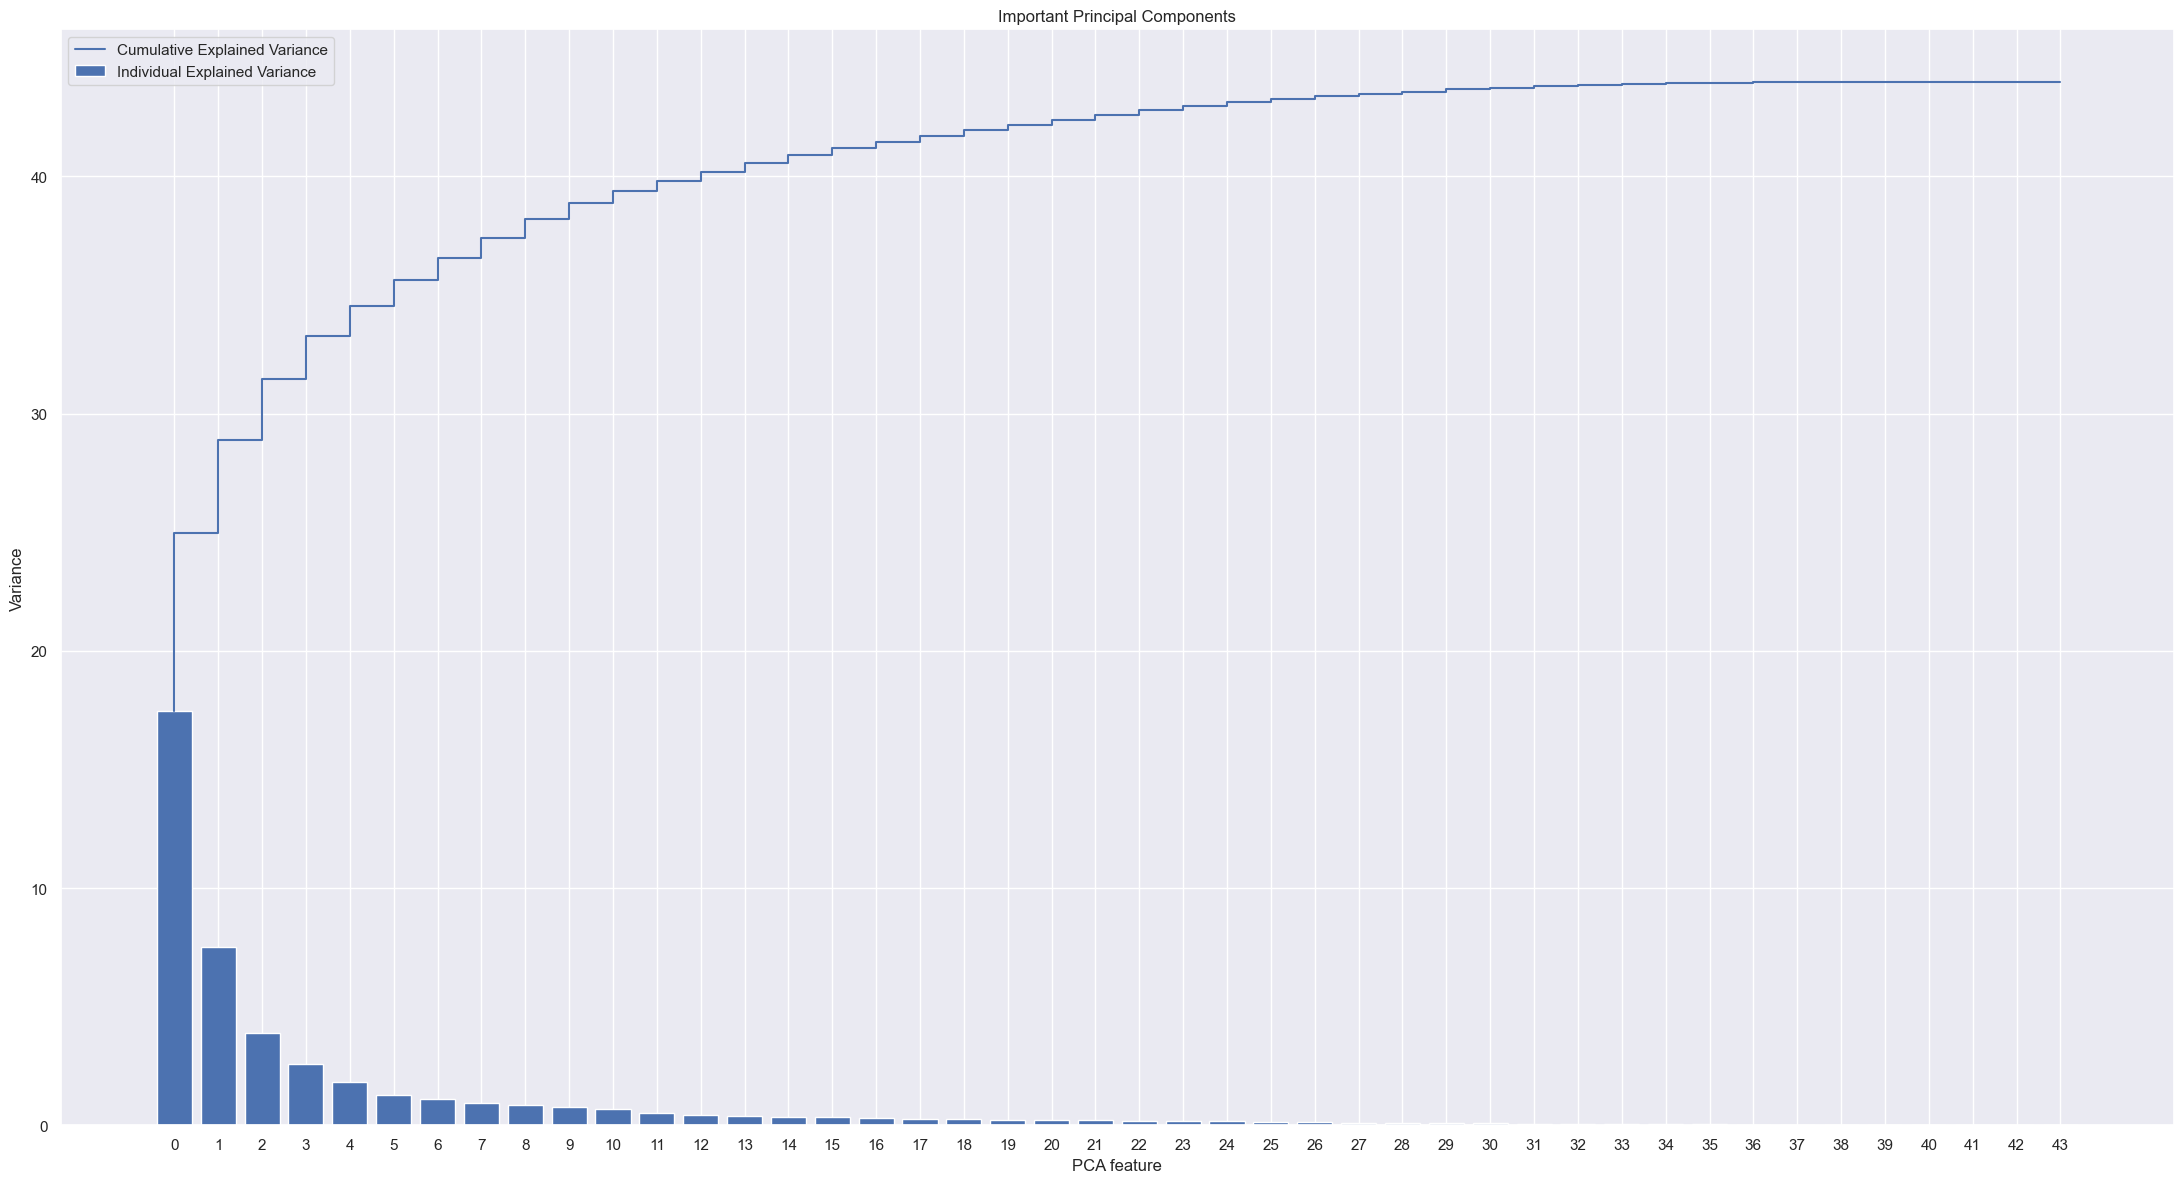

In [10]:
# Plot the principal components
features = range(pca.n_components_)
_ = plt.figure(figsize=(22, 12))
_ = plt.bar(features, pca.explained_variance_, label = 'Individual Explained Variance')
_ = plt.step(features, np.cumsum(pca.explained_variance_), label = 'Cumulative Explained Variance')
_ = plt.xlabel('PCA feature')
_ = plt.ylabel('Variance')
_ = plt.xticks(features)
_ = plt.title("Important Principal Components")
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [12]:
# Calculate PCA with 2 components
pca_2 = PCA(n_components=2)
pComponents_2 = pca_2.fit_transform(sensors_scaled.iloc[:,1:-1])
principal_df_2 = pd.DataFrame(data = pComponents_2, columns = ['pc1', 'pc2'])
principal_df_2.head()

pc1       pc2
0 -0.052115  0.379152
1 -0.052115  0.379152
2 -0.192002  0.427891
3 -0.193824  0.406918
4 -0.149628  0.547579

In [13]:
pca_0p95 = PCA()# give the components which contain 0.95% of the variance
pca_0p95.fit(sensors_scaled.iloc[:,1:-1])
cumsum = np.cumsum(pca_0p95.explained_variance_)
dims = np.argmax(cumsum >=0.95) + 1
dims

1

In [14]:
pca_0p90 = PCA(n_components=0.90)# give the components which contain 90% of the variance
sensors_scaled_reduced_0p90 = pca_0p90.fit_transform(sensors_scaled.iloc[:,1:-1])
sensors_scaled_reduced_0p90.shape

(220320, 13)

In [25]:
pca_0p55 = PCA(n_components=0.55)# give the components which contain 55% of the variance
sensors_scaled_reduced_0p55 = pca_0p55.fit_transform(sensors_scaled.iloc[:,1:-1])
sensors_scaled_reduced_0p55.shape
# With 5 sensors we capture 55% of the variance

(220320, 2)

In [27]:
sensorsdf_red_0p55= pd.DataFrame(data = sensors_scaled_reduced_0p55,
                            columns = ['pc1', 'pc2'])
# These are the orthogonal projections of the 5 main components with a 75% of variance.

sensorsdf_red_0p55.head()

pc1       pc2
0 -0.052115  0.379152
1 -0.052115  0.379152
2 -0.192002  0.427891
3 -0.193824  0.406918
4 -0.149628  0.547579

In [28]:
sensorsdf_red_0p55.to_csv('sensorsdf_red_pca_0p55.csv')

## 1.6 Stationarity & Autocorrelation

In [29]:
from statsmodels.tsa.stattools import adfuller

# Run Augmented Dickey Fuller Test
result = adfuller(sensorsdf_red_0p55['pc1'])
# Print p-value
print(result[1])

0.00014186147377080594


In [30]:
# Autocorrelation

# Compute change in daily mean 
pca1 = sensorsdf_red_0p55['pc1'].pct_change()
# Compute autocorrelation
autocorrelation = pca1.dropna().autocorr()
print('Autocorrelation is: ', autocorrelation)

Autocorrelation is:  -7.2269261738849734e-06


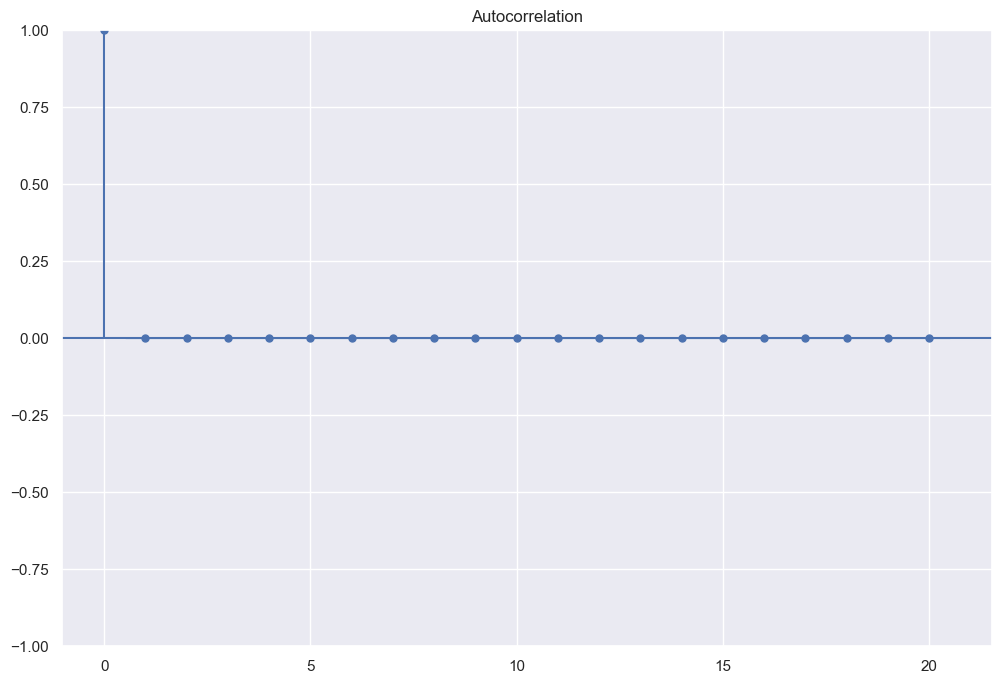

In [31]:
# Plot ACF
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(pca1.dropna(), lags=20, alpha=0.05)
plt.show()

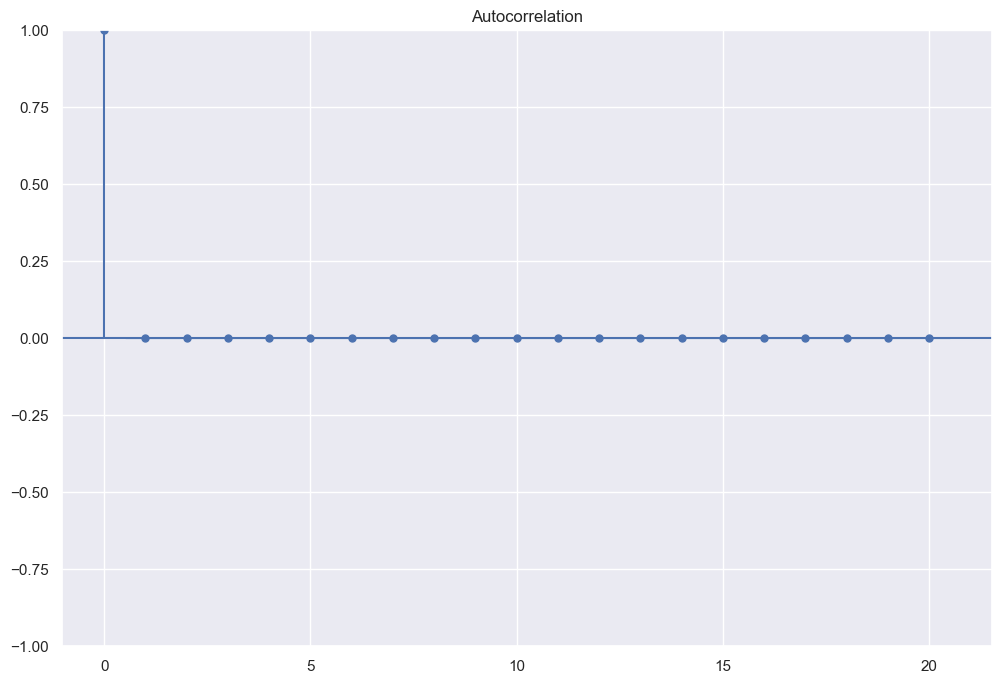

In [32]:
# Plot ACF second component
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sensorsdf_red_0p55['pc2'].pct_change().dropna(), lags=20, alpha=0.05)
plt.show()